<h1 style="font-size: 3em;">Etude de marché: ACP, Clustering, Analyses</h1>




![logo](./logo.jpg)

Après avoir sélectionné les variables et rassemblé les données dans un DataFrame, ainsi que nettoyé et préparé ces données, nous allons nous engager dans l'étude de marché proprement dite dans ce notebook.

Nous réaliserons une réduction des données à l'aide de l'analyse en composantes principales (ACP), qui nous permettra de réduire la dimensionnalité tout en préservant l'information essentielle. Ensuite, nous appliquerons des méthodes de clustering, notamment la classification ascendante hiérarchique (CAH) et K-means, pour identifier des groupes de pays. Ces analyses nous aideront à isoler les pays les plus prometteurs pour l'exportation de nos produits.

Nous espérons ainsi fournir des recommandations basées sur des données objectives et pertinentes pour guider notre stratégie d'internationalisation.

# Sommaire

### [1. Préparation](#section1)
### [2. Réalisation d'une ACP](#section2)
### [3. Rotation VARIMAX](#section3)
### [4. Réalisation d'une classification ascendante hiérarchique](#section4)
### [5. Détermination des clusters avec les Kmeans](#section5)
### [6. Comparaisons des deux méthodes](#section6)
### [7. Interprétation des clusters Kmeans](#section7)
### [8. Conclusion](#section8)


# <a id="section1"></a>1. Préparation

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np

# importer les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from factor_analyzer.factor_analyzer import calculate_kmo

# Chargement du fichier

In [2]:
# importer le df 'analysis_work_df' 
df = pd.read_csv('analysis_work_df_transformed.csv',delimiter= ',')
analysis_work_df=pd.read_csv('analysis_work_df.csv',delimiter= ',')


In [3]:
# vérifier l'import
df.head()

,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
0,Afghanistan,17.506874,25.54,12.50,1.63,-0.15,3.526361,0.54,13.79,19.39,8.628913,7.668514,-7.99,-2.52,Asia
1,Algeria,17.603737,73.91,7.39,6.16,-0.11,0.000000,0.00,0.00,-39.66,7.201171,9.479749,-4.50,-0.74,Africa
2,Angola,17.356579,66.27,14.22,8.72,-0.17,5.509388,0.81,-11.19,-6.18,8.781248,8.910329,-7.99,-0.65,Africa
3,Argentina,17.628305,93.53,2.77,39.89,0.09,2.397895,0.00,25.00,12.04,9.312265,10.208336,-1.26,-0.01,South America
4,Australia,17.070567,85.63,5.41,39.89,-0.05,1.386294,0.00,-15.97,-39.66,9.739556,10.987341,4.08,0.93,Oceania


In [4]:
# afficher les dimensions
df.shape

(113, 15)

In [5]:
# afficher les stats
df.describe()

,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.00000,113.000000
mean,17.040682,59.023274,5.719912,17.520354,0.117080,3.185487,0.249558,23.145929,5.840000,8.362737,9.372369,3.00000,-0.455575
std,1.177252,22.491469,4.844162,12.846413,0.245915,2.129807,0.282263,41.311311,30.288489,0.882296,1.223550,6.65381,0.945848
min,15.450563,12.070000,-8.460000,1.630000,-0.180000,0.000000,0.000000,-15.970000,-39.660000,5.572154,6.754837,-7.99000,-2.660000
25%,16.145550,39.440000,2.190000,6.200000,-0.060000,1.098612,0.010000,0.000000,-11.070000,7.875119,8.373692,-2.43000,-0.930000
50%,16.805715,58.220000,5.480000,15.480000,0.040000,3.526361,0.130000,0.000000,0.000000,8.566174,9.479749,3.80000,-0.350000
75%,17.675965,78.430000,9.680000,26.140000,0.230000,4.779123,0.410000,39.420000,17.960000,9.078408,10.472482,7.65000,0.140000
max,21.100287,98.600000,16.170000,39.890000,0.650000,7.638198,0.810000,116.670000,65.510000,9.866045,11.393162,13.42000,1.310000


# <a id="section2"></a>2. Réalisation d'une ACP

# Calcul du KMO

In [6]:
# calculer l'indice KMO
kmo_all, kmo_model = calculate_kmo(analysis_work_df.select_dtypes(include=['float64', 'int64']))

analysis_work_df_numeric = analysis_work_df.select_dtypes(include=['float64', 'int64'])
# créer un dictionnaire pour associer chaque colonne avec son score KMO
kmo_scores_per_column = dict(zip(analysis_work_df_numeric.columns, kmo_all))

# afficher le KMO pour chaque variable
print("KMO pour chaque variable :")
for variable, kmo_score in kmo_scores_per_column.items():
    print(f"{variable}: {kmo_score}")

# afficher le KMO global
print(f"KMO global : {kmo_model}")


KMO pour chaque variable :
Population: 0.3650815412741636
Urban_Population_Rate: 0.7365471125442302
Demographic_Evolution: 0.856783225501334
Consumption_per_Person: 0.6332801336742118
Evolution_Consumption_per_Person: 0.13284937151429127
Importations: 0.5868899644494429
Part_Importation_Consumption: 0.4737405978391614
Evolution_Importations: 0.42981887790413725
Evolution_Part_Importation_Consumption: 0.4342695394013425
Distance: 0.33356484356330796
GDP: 0.7832461225608669
GDP_Evolution: 0.487370299233542
Political Stability: 0.6341126961407201
KMO global : 0.5821773673055638


In [7]:
# variables à exclure (KMO < 0.5)
low_kmo_variables = ['Population', 'Evolution_Consumption_per_Person', 'Evolution_Importations', 'Distance', 'Evolution_Part_Importation_Consumption']

# créer un nouveau DataFrame sans ces variables
analysis_work_df_filtered = analysis_work_df_numeric.drop(low_kmo_variables, axis=1)

# recalculer le KMO sur le DataFrame filtré
kmo_all_filtered, kmo_model_filtered = calculate_kmo(analysis_work_df_filtered.select_dtypes(include=['float64', 'int64']))

# afficher le KMO global
print(f"KMO global après suppression des variables à faible KMO : {kmo_model_filtered}")

# afficher le KMO pour chaque variable restante
print("KMO pour chaque variable restante :")
for variable, kmo_score in zip(analysis_work_df_filtered.columns, kmo_all_filtered):
    print(f"{variable}: {kmo_score}")


KMO global après suppression des variables à faible KMO : 0.759038977781205
KMO pour chaque variable restante :
Urban_Population_Rate: 0.74356393419782
Demographic_Evolution: 0.8837914911424202
Consumption_per_Person: 0.7205539419029854
Importations: 0.7985793107292842
Part_Importation_Consumption: 0.4293001680019793
GDP: 0.8246120135639569
GDP_Evolution: 0.5573599745157052
Political Stability: 0.7842507864688972


### KMO pour chaque variable :

| Variable                             | KMO Initial | KMO Révisé  |
|--------------------------------------|-------------|-------------|
| Population                           | 0.3651      | -           |
| Urban_Population_Rate                | 0.7365      | 0.7436      |
| Demographic_Evolution                | 0.8568      | 0.8838      |
| Consumption_per_Person               | 0.6333      | 0.7206      |
| Evolution_Consumption_per_Person     | 0.1328      | -           |
| Importations                         | 0.5869      | 0.7986      |
| Part_Importation_Consumption         | 0.4737      | 0.4293      |
| Evolution_Importations               | 0.4298      | -           |
| Evolution_Part_Importation_Consumption | 0.4343      | -           |
| Distance                             | 0.3336      | -           |
| GDP                                  | 0.7832      | 0.8246      |
| GDP_Evolution                        | 0.4874      | 0.5574      |
| Political Stability                  | 0.6341      | 0.7843      |
| **KMO Global**                       | **0.5822**  | **0.7590**  |


In [8]:
# Séparation des variables principales en excluant les variables à faible KMO
main_vars = df.drop(columns=low_kmo_variables)

# Sélection des variables à faible KMO
low_kmo_vars = df[low_kmo_variables]

# Data Split

In [9]:
# passer 'Country' en index
main_vars.set_index(keys='Country',drop=True,inplace=True)
main_vars

,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Importations,Part_Importation_Consumption,GDP,GDP_Evolution,Political Stability,Continent
Country,,,,,,,,,
Afghanistan,25.54,12.50,1.63,3.526361,0.54,7.668514,-7.99,-2.52,Asia
Algeria,73.91,7.39,6.16,0.000000,0.00,9.479749,-4.50,-0.74,Africa
Angola,66.27,14.22,8.72,5.509388,0.81,8.910329,-7.99,-0.65,Africa
Argentina,93.53,2.77,39.89,2.397895,0.00,10.208336,-1.26,-0.01,South America
Australia,85.63,5.41,39.89,1.386294,0.00,10.987341,4.08,0.93,Oceania
...,...,...,...,...,...,...,...,...,...
United States of America,82.08,2.19,39.89,4.976734,0.01,11.174790,5.34,-0.04,North America
Uzbekistan,49.79,6.69,6.51,4.605170,0.45,9.041744,13.42,-0.20,Asia
Viet Nam,38.76,3.65,16.94,5.356586,0.13,9.480619,13.42,-0.03,Asia


In [10]:
# Sauvegarder la colonne 'Continent' dans une variable
continent_data = main_vars['Continent'].copy()

# Supprimer la colonne 'Continent' du DataFrame
main_vars = main_vars.drop(columns=['Continent'])

In [11]:
# charger la matrice de données
X = main_vars.values
X

array([[ 2.55400000e+01,  1.25000000e+01,  1.63000000e+00,
         3.52636052e+00,  5.40000000e-01,  7.66851438e+00,
        -7.99000000e+00, -2.52000000e+00],
       [ 7.39100000e+01,  7.39000000e+00,  6.16000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.47974900e+00,
        -4.50000000e+00, -7.40000000e-01],
       [ 6.62700000e+01,  1.42200000e+01,  8.72000000e+00,
         5.50938834e+00,  8.10000000e-01,  8.91032928e+00,
        -7.99000000e+00, -6.50000000e-01],
       [ 9.35300000e+01,  2.77000000e+00,  3.98900000e+01,
         2.39789527e+00,  0.00000000e+00,  1.02083364e+01,
        -1.26000000e+00, -1.00000000e-02],
       [ 8.56300000e+01,  5.41000000e+00,  3.98900000e+01,
         1.38629436e+00,  0.00000000e+00,  1.09873415e+01,
         4.08000000e+00,  9.30000000e-01],
       [ 5.81900000e+01,  1.42000000e+00,  1.64800000e+01,
         4.70048037e+00,  7.40000000e-01,  1.10949509e+01,
         1.18000000e+00,  6.40000000e-01],
       [ 5.60400000e+01,  2.400000

In [12]:
X.shape

(113, 8)

In [13]:
# stocker le nom des pays dans la variables countries
countries = main_vars.index
countries

Index(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America', 'Uzbekistan',
       'Viet Nam', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=113)

In [14]:
# stocker les colonnes dans la variable features
features = main_vars.columns
features

Index(['Urban_Population_Rate', 'Demographic_Evolution',
       'Consumption_per_Person', 'Importations',
       'Part_Importation_Consumption', 'GDP', 'GDP_Evolution',
       'Political Stability'],
      dtype='object')

# Scaling

Centrer et reduire nos données

In [15]:
# instancier
scaler = StandardScaler()

In [16]:
# entraîner
scaler.fit(X)

StandardScaler()

In [17]:
# transformer
X_scaled = scaler.transform(X)
X_scaled

array([[-1.49534121e+00,  1.40587559e+00, -1.24245857e+00,
         1.60761751e-01,  1.03356346e+00, -1.39875251e+00,
        -1.65904248e+00, -2.19234005e+00],
       [ 6.64831464e-01,  3.46298821e-01, -8.88260207e-01,
        -1.50233203e+00, -8.88070979e-01,  8.81519261e-02,
        -1.13219460e+00, -3.02048222e-01],
       [ 3.23634044e-01,  1.76252374e+00, -6.88095130e-01,
         1.09599262e+00,  1.99438068e+00, -3.79304197e-01,
        -1.65904248e+00, -2.06471669e-01],
       [ 1.54104787e+00, -6.11674698e-01,  1.74907106e+00,
        -3.71442354e-01, -8.88070979e-01,  6.86274265e-01,
        -6.43086532e-01,  4.73183821e-01],
       [ 1.18823902e+00, -6.42612585e-02,  1.74907106e+00,
        -8.48531175e-01, -8.88070979e-01,  1.32578614e+00,
         1.63036022e-01,  1.47142782e+00],
       [-3.72134887e-02, -8.91602024e-01, -8.13447402e-02,
         7.14497365e-01,  1.74527992e+00,  1.41412644e+00,
        -2.74745889e-01,  1.16345893e+00],
       [-1.33231087e-01, -6.883955

In [18]:
# vérifier que la moyenne = 0 et l'écart type 1
pd.DataFrame(X_scaled).describe().round(2).loc[["mean", "std"], :]

,0,1,2,3,4,5,6,7
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# ACP

In [19]:
# instancier avec 5 composantes de départ
n_components= 5
pca = PCA(n_components=n_components)

In [20]:
# entraîner
pca.fit(X_scaled)

PCA(n_components=5)

# Variance expliquée

In [21]:
# Variance de chaque composant
variance_expliquee = pca.explained_variance_

# Créer un DataFrame pour visualiser la variance expliquée
main_vars_variance = pd.DataFrame({
    'Composant Principal': [f'PC{i+1}' for i in range(len(variance_expliquee))],
    'Variance Expliquée': variance_expliquee
})
main_vars_variance

,Composant Principal,Variance Expliquée
0,PC1,3.921391
1,PC2,1.455005
2,PC3,1.143662
3,PC4,0.535245
4,PC5,0.464165


In [22]:
pca.explained_variance_ratio_

array([0.4858361 , 0.18026607, 0.14169265, 0.06631358, 0.05750722])

In [23]:
# enregistrer dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([48.58, 18.03, 14.17,  6.63,  5.75])

In [24]:
# faire la somme cumulée des ratios
scree_cum = scree.cumsum().round()
scree_cum

array([49., 67., 81., 87., 93.])

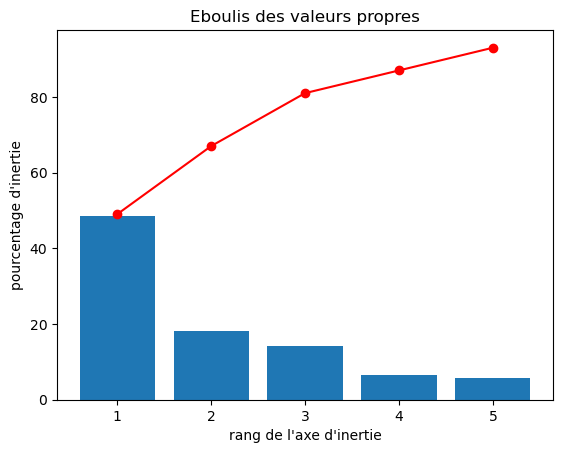

In [25]:
# tracer le graphique des éboulis propres
x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('Eboulis des valeurs propres.png')
plt.show(block=False)

On constate un coude significatif au niveau de la 3ème composante.

80% de la variance est expliquée par les 3 premières composantes, ce qui est très satisfaisant.


# Composants et charges factorielles

In [26]:
# affichage des composants
pcs = pca.components_
pcs

array([[-0.43816355,  0.40200588, -0.40888673, -0.33113601, -0.06957616,
        -0.47157381, -0.13483427, -0.35236569],
       [ 0.04375502,  0.16794413, -0.08600806,  0.5212307 ,  0.75319099,
        -0.12370963, -0.30682112, -0.11858119],
       [ 0.28284364, -0.03557726,  0.35578859, -0.0828142 , -0.27673046,
        -0.00265696, -0.75013726, -0.38209595],
       [ 0.04691934,  0.09546003,  0.29640783,  0.37474113, -0.16200859,
        -0.10118001,  0.51678634, -0.6759032 ],
       [-0.20535578, -0.81000321, -0.38517498,  0.02006583,  0.06810178,
         0.10167525, -0.0629226 , -0.36609621]])

In [27]:
# mettre sous forme de Df
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Importations,Part_Importation_Consumption,GDP,GDP_Evolution,Political Stability
F1,-0.44,0.40,-0.41,-0.33,-0.07,-0.47,-0.13,-0.35
F2,0.04,0.17,-0.09,0.52,0.75,-0.12,-0.31,-0.12
F3,0.28,-0.04,0.36,-0.08,-0.28,-0.00,-0.75,-0.38
F4,0.05,0.10,0.30,0.37,-0.16,-0.10,0.52,-0.68
F5,-0.21,-0.81,-0.39,0.02,0.07,0.10,-0.06,-0.37


In [28]:
# transposer pour une meilleure lisibilité
pcs.T

,F1,F2,F3,F4,F5
Urban_Population_Rate,-0.438164,0.043755,0.282844,0.046919,-0.205356
Demographic_Evolution,0.402006,0.167944,-0.035577,0.095460,-0.810003
Consumption_per_Person,-0.408887,-0.086008,0.355789,0.296408,-0.385175
Importations,-0.331136,0.521231,-0.082814,0.374741,0.020066
Part_Importation_Consumption,-0.069576,0.753191,-0.276730,-0.162009,0.068102
GDP,-0.471574,-0.123710,-0.002657,-0.101180,0.101675
GDP_Evolution,-0.134834,-0.306821,-0.750137,0.516786,-0.062923
Political Stability,-0.352366,-0.118581,-0.382096,-0.675903,-0.366096


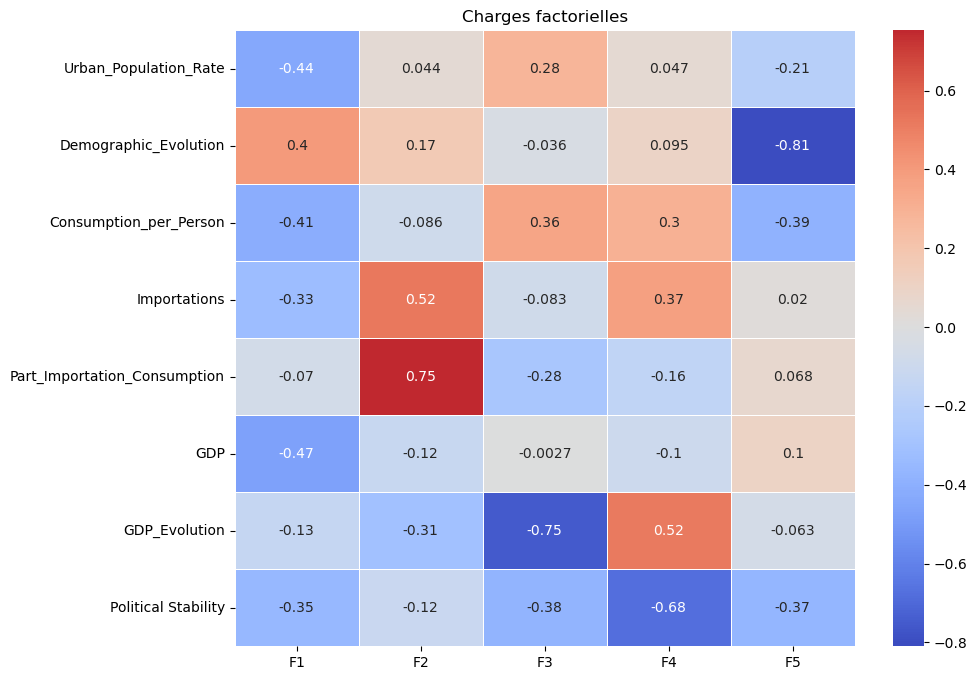

In [29]:
# mettre sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pcs.T, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Charges factorielles')
plt.show()

# Cercles de corrélation

In [30]:
def correlation_graph_df(df_loadings, 
                      x_y, 
                      features) : 
    

    # Extrait x et y 
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(df_loadings.shape[0]):
        # Les flèches
        ax.arrow(0, 0, 
                 df_loadings.iloc[i, x],  
                 df_loadings.iloc[i, y],  
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02)

        # Les labels
        plt.text(df_loadings.iloc[i, x] + 0.05,
                 df_loadings.iloc[i, y] + 0.05,
                 features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué (à adapter si nécessaire)
    plt.xlabel(f'F{x+1}')
    plt.ylabel(f'F{y+1}')
    
    plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour l'échelle

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

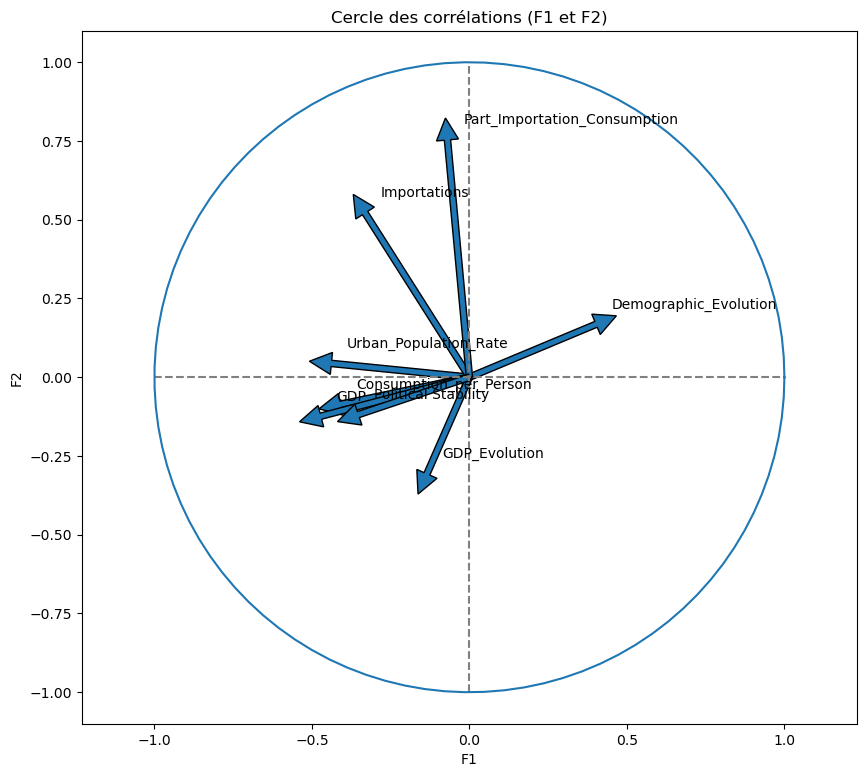

In [31]:
# tracer le cercle de corrélation sur F1 et F2
correlation_graph_df(pcs.T, [0, 1], features)

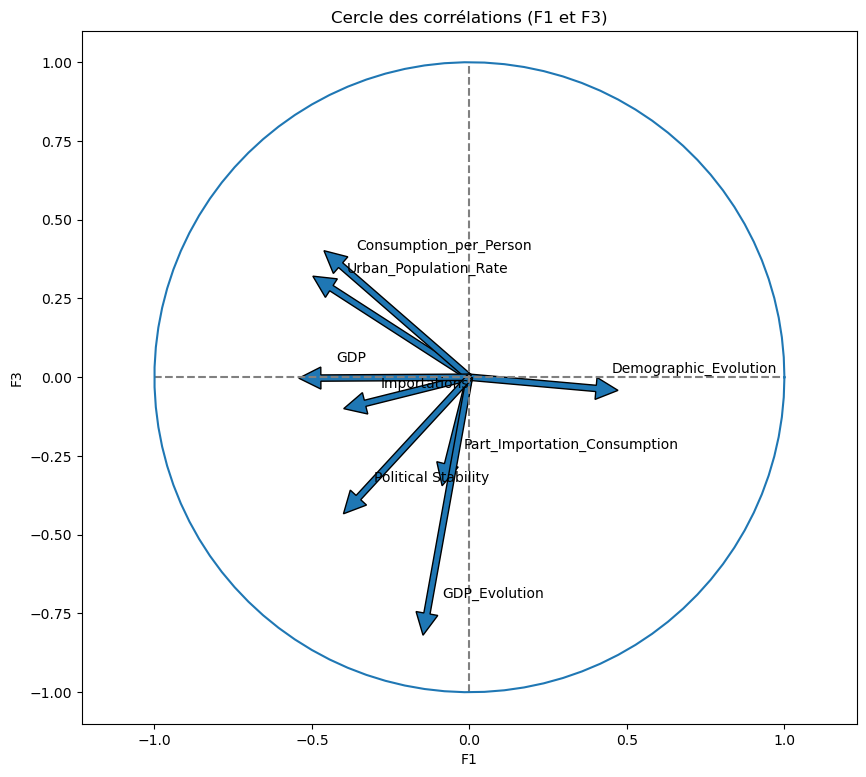

In [32]:
# tracer le cercle de corrélation sur F3 et F4
correlation_graph_df(pcs.T, [0, 2], features)

# <a id="section3"></a>3. Rotation VARIMAX

In [33]:
# Créer l'analyse factorielle
fa = FactorAnalyzer(n_factors=5, rotation='varimax')

# Ajuster sur les données
fa.fit(X_scaled)

# Obtenir les charges factorielles après rotation
loadings = fa.loadings_

# Variance expliquée par chaque facteur après rotation
var_expliquee = fa.get_factor_variance()
var_expliquee

(array([3.13699174, 1.2033773 , 0.93005001, 0.81949918, 0.18730015]),
 array([0.39212397, 0.15042216, 0.11625625, 0.1024374 , 0.02341252]),
 array([0.39212397, 0.54254613, 0.65880238, 0.76123978, 0.7846523 ]))

# Composants et charges factorielles après rotation

In [34]:
# Créer un DataFrame avec les charges factorielles
facteurs = [f'F{i+1}' for i in range(5)]
df_loadings = pd.DataFrame(loadings, index=features, columns=facteurs)
df_loadings

,F1,F2,F3,F4,F5
Urban_Population_Rate,0.866591,0.097777,-0.021078,0.174191,0.133617
Demographic_Evolution,-0.696090,0.041031,-0.245511,-0.135392,0.173299
Consumption_per_Person,0.805746,-0.133090,-0.011822,0.269809,0.322180
Importations,0.385143,0.440840,0.089517,0.802568,0.016454
Part_Importation_Consumption,-0.038868,0.974809,-0.041038,0.203770,-0.009485
GDP,0.914798,0.042079,0.338556,0.100659,-0.182275
GDP_Evolution,0.041734,-0.066816,0.670392,0.045729,-0.024876
Political Stability,0.513615,0.153601,0.543550,-0.012940,0.037555


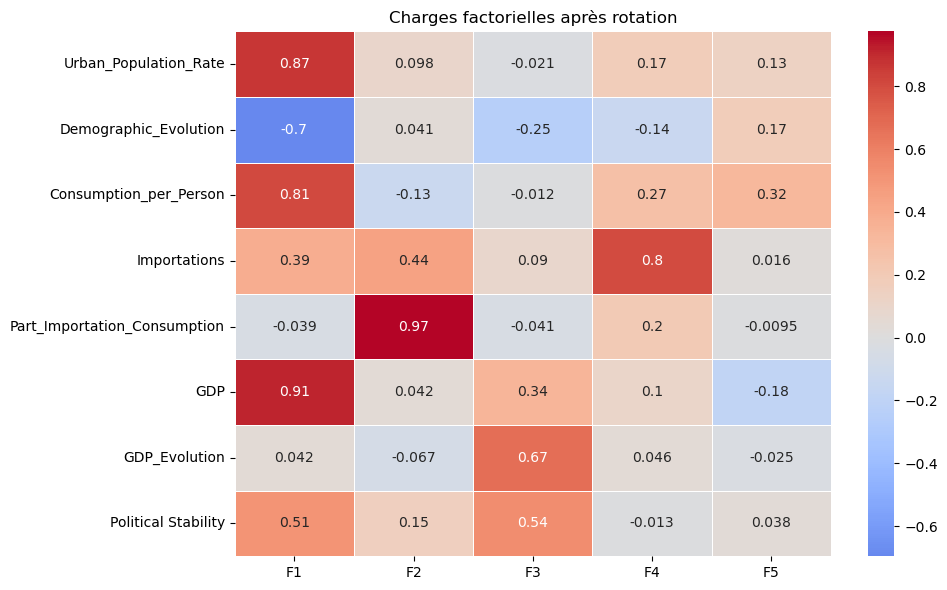

In [35]:
# Créer une heatmap pour visualiser les charges factorielles après rotation
plt.figure(figsize=(10, 6))
sns.heatmap(df_loadings, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Charges factorielles après rotation')
plt.tight_layout()
plt.savefig('Charges factorielles après rotation.png')
plt.show()

# Cercles de corrélation après rotation

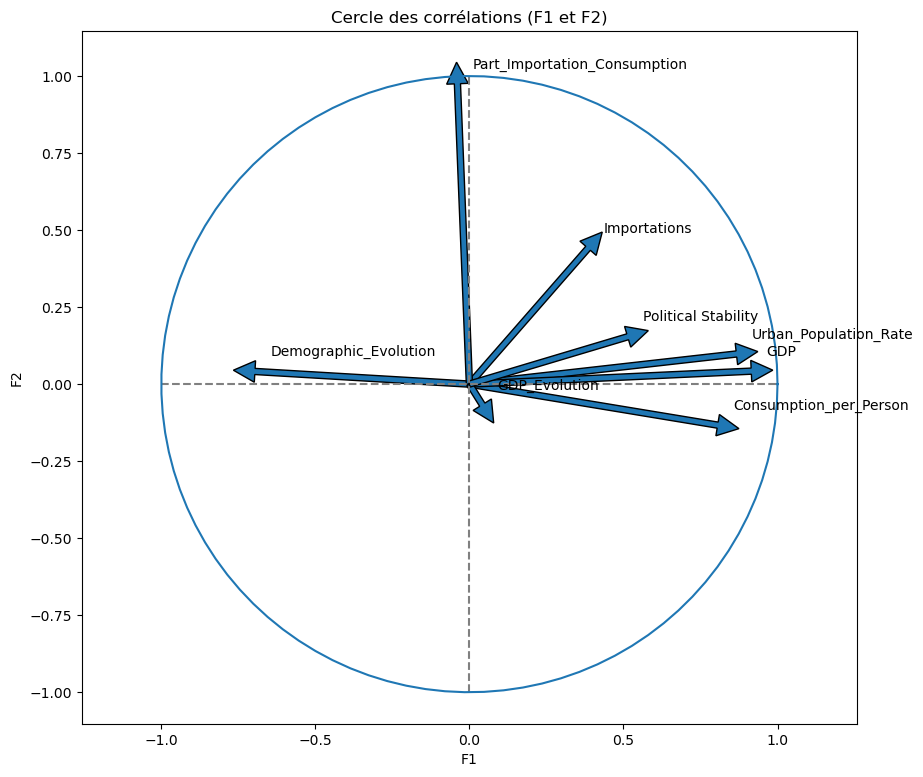

In [36]:
# tracer le cercle de corrélation sur F1 et F2
correlation_graph_df(df_loadings, [0, 1], features)

**Première interprétation**

**F1** :Développement économique

**F2** : dépendances aux importations de viande de volailles

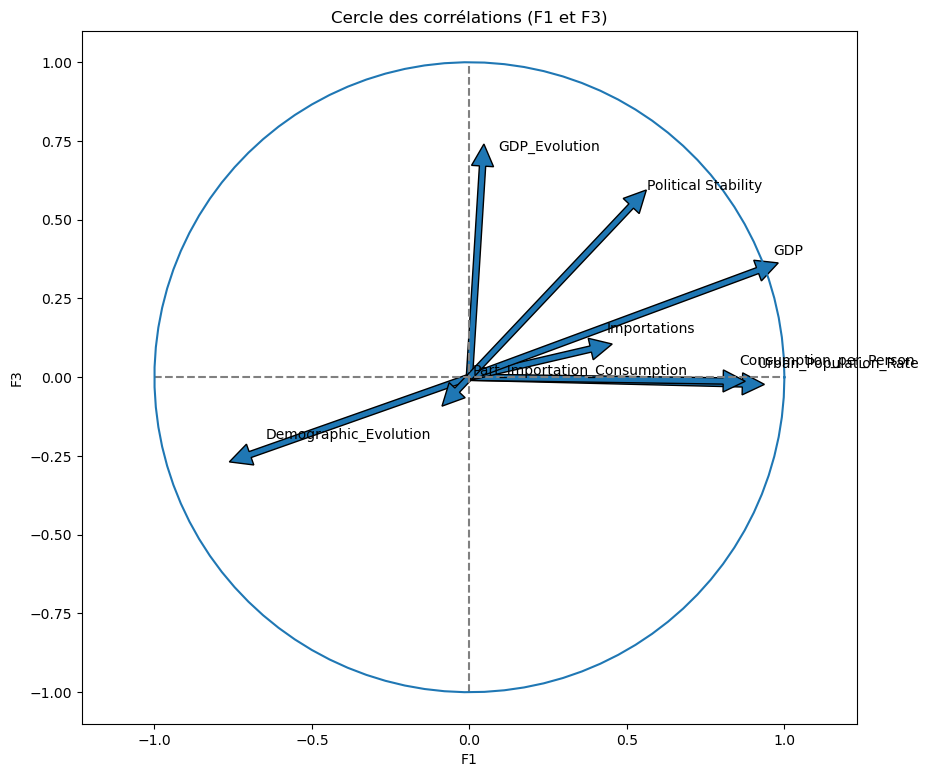

In [37]:
# # tracer le cercle de corrélation sur F1 et F3
correlation_graph_df(df_loadings, [0,2], features)

**Interprétation possible de F3**  : Santé économique

# Projection des individus

In [38]:
# Definir la fonction de projection sur les plans factoriels
def display_factorial_planes(X_projected, x_y, fa=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    X_ = np.array(X_projected)
    if not figsize:
        figsize = (7, 6)

    if labels is None:
        labels = []
        
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")   
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")   

    x, y = x_y

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    c = None if clusters is None else clusters

    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

   
    # Utiliser  les valeurs du tableau scree
    v1 = str(round(var_expliquee[1][0], 2)*100) + " %"  # Variance expliquée pour la composante x
    v2 = str(round(var_expliquee[1][1], 2)*100) + " %"  # Variance expliquée pour la composante y


    ax.set_xlabel(f'F{x+1} ({v1})')
    ax.set_ylabel(f'F{y+1} ({v2})')

    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    if len(labels): 
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, labels[i], fontsize='14', ha='center', va='center') 

    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
   
    plt.show()


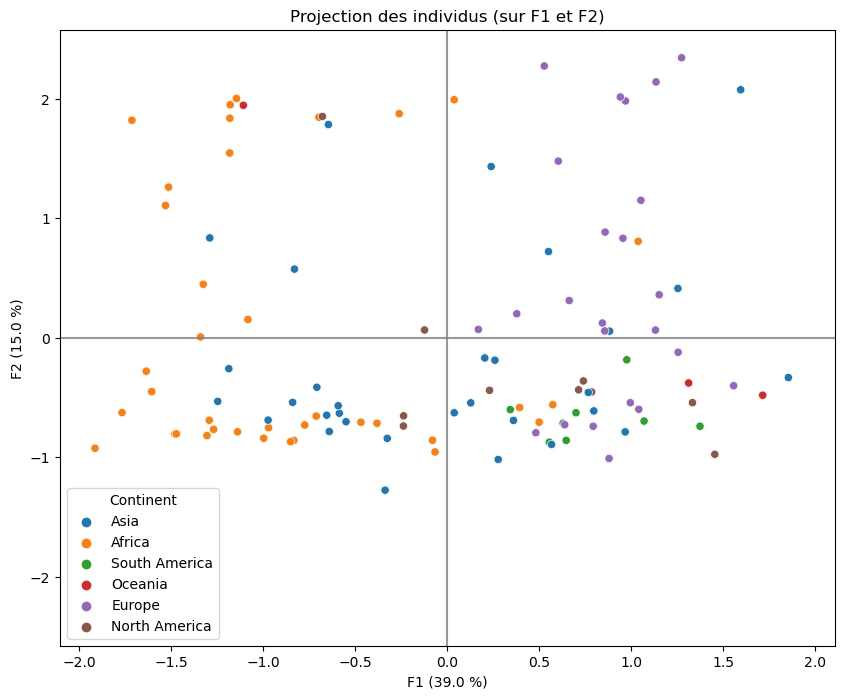

In [39]:
# appeller la fonction avec la variable fa pour projeter les individus
X_proj = fa.transform(X_scaled)  
display_factorial_planes(X_proj, x_y=[0, 1], fa=fa, clusters=continent_data)

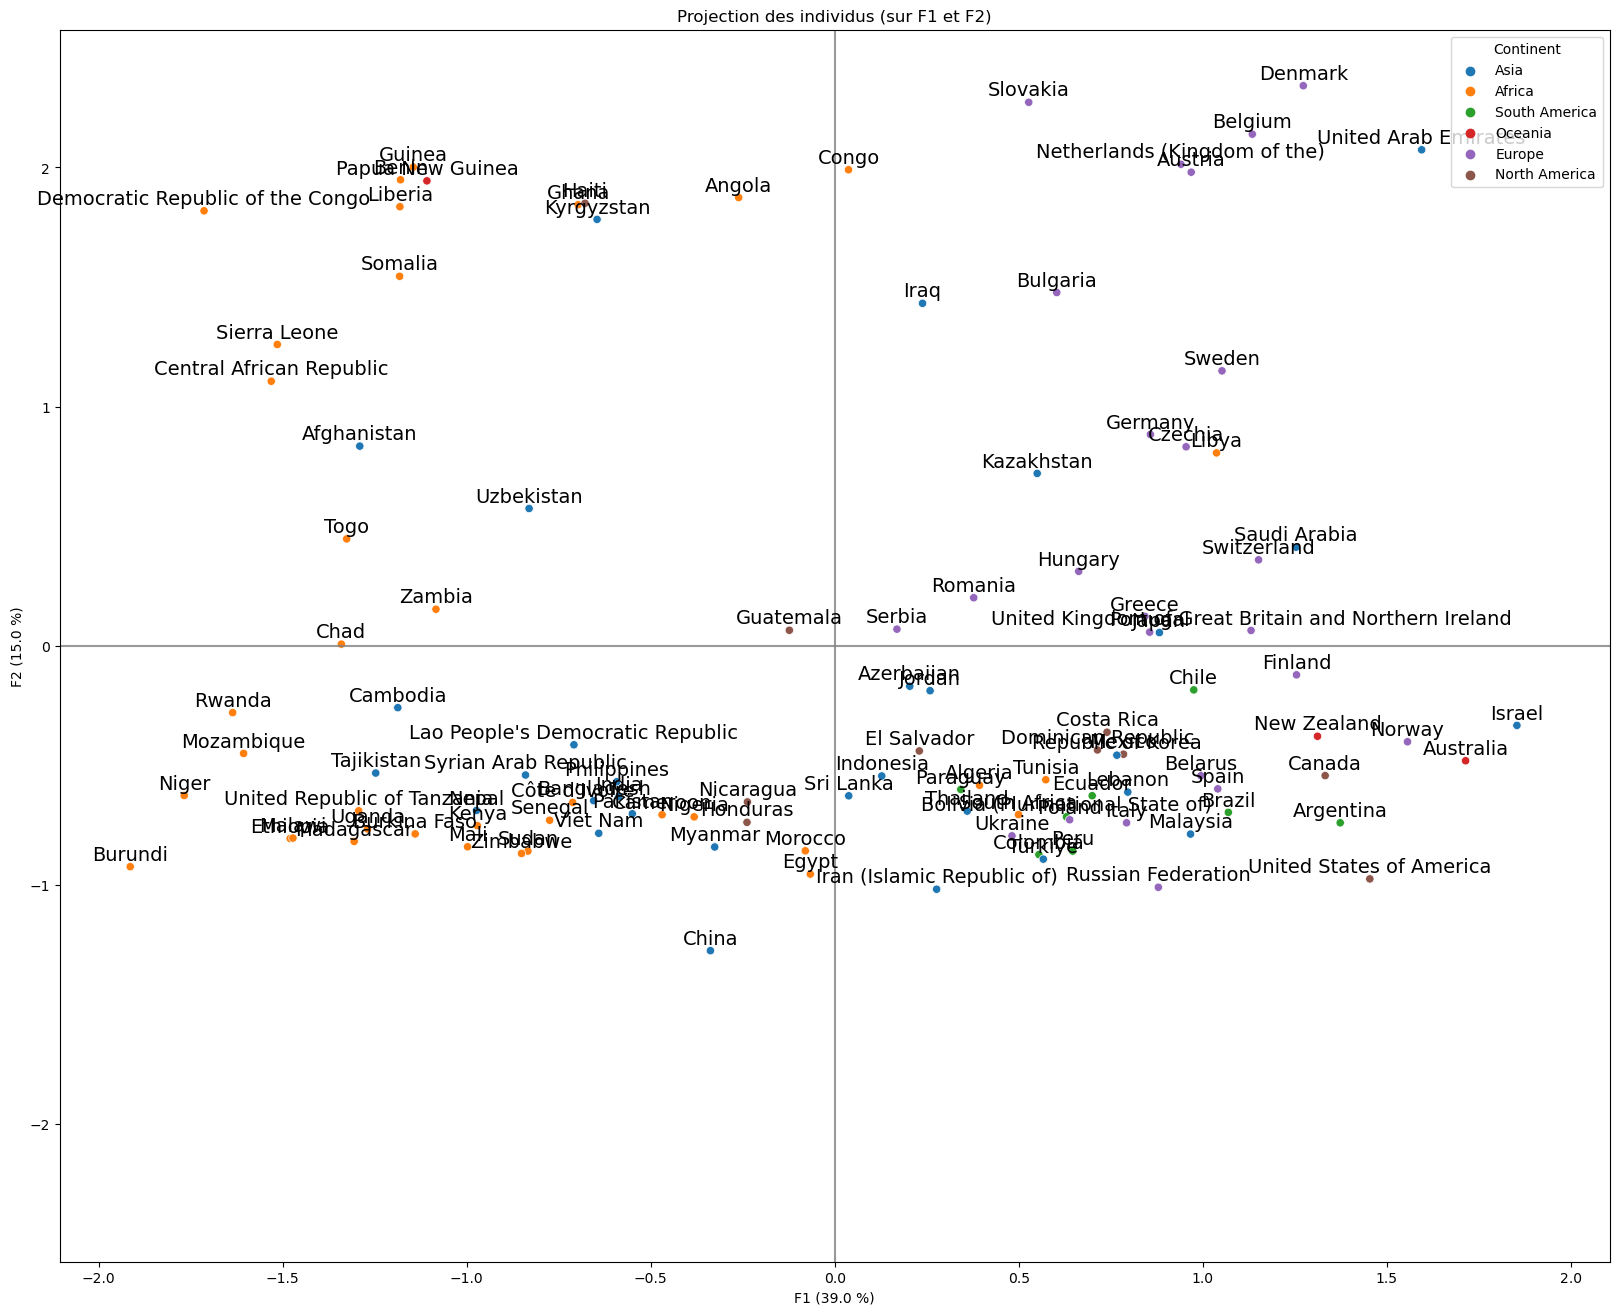

In [40]:
# projeter avec les étiquettes de pays
display_factorial_planes(X_proj, x_y=[0, 1], fa=fa, labels=countries,  clusters= continent_data, figsize=(20,16), marker="o")

### Interprétation des pays intéressants selon F1 et F2 :

**1. Pays économiquement développés, avec un fort pouvoir d'achat et une forte consommation de viande (F1 positif, F2 négatif)**

Ces pays sont économiquement développés, avec une population qui consomme beaucoup de viande, mais qui dépend peu des importations pour leur consommation. Ils ont une forte production intérieure qui couvre une grande partie de leur demande, ce qui en fait des marchés potentiellement moins ouverts aux exportations. Cependant, les consommateurs locaux étant nombreux et avec un pouvoir d'achat élevé, il peut y avoir des opportunités pour des produits de niches ou de qualité supérieure, comme ceux proposés par la poule qui chante.

**2. Pays économiquement développés, avec un fort pouvoir d'achat et une forte dépendance à l'importation de viande (F1 positif, F2 positif)**

Ces pays sont économiquement prospères, avec une population ayant un fort pouvoir d'achat et une grande consommation de viande, mais qui dépend fortement des importations pour satisfaire cette demande. Cela en fait des cibles très attractives pour l'exportation de viande.


**3. Pays avec une faible consommation de viande et une dépendance limitée aux importations (F1 négatif, F2 négatif)**

Ces pays ont une faible consommation de viande, souvent associée à des revenus plus bas ou à des habitudes alimentaires différentes, et ne dépendent pas vraiment des importations.  Cela en fait des marchés peu attractifs pour l'exportation, car la demande locale pour des produits comme le poulet biologique est limitée. Les opportunités sont rares, et l’introduction de produits bio pourrait nécessiter un effort considérable en matière de sensibilisation et de marketing.

**4. Pays avec une faible consommation de viande et une forte dépendance aux importations (F1 négatif, F2 positif)**

Ces pays, bien qu'ayant une faible consommation de viande par habitant, dépendent largement des importations pour répondre à leur demande. Ils pourraient ne pas être les marchés les plus lucratifs en termes de volume, et ne pas être particulièrement réceptifs à des produits de qualité supérieure.

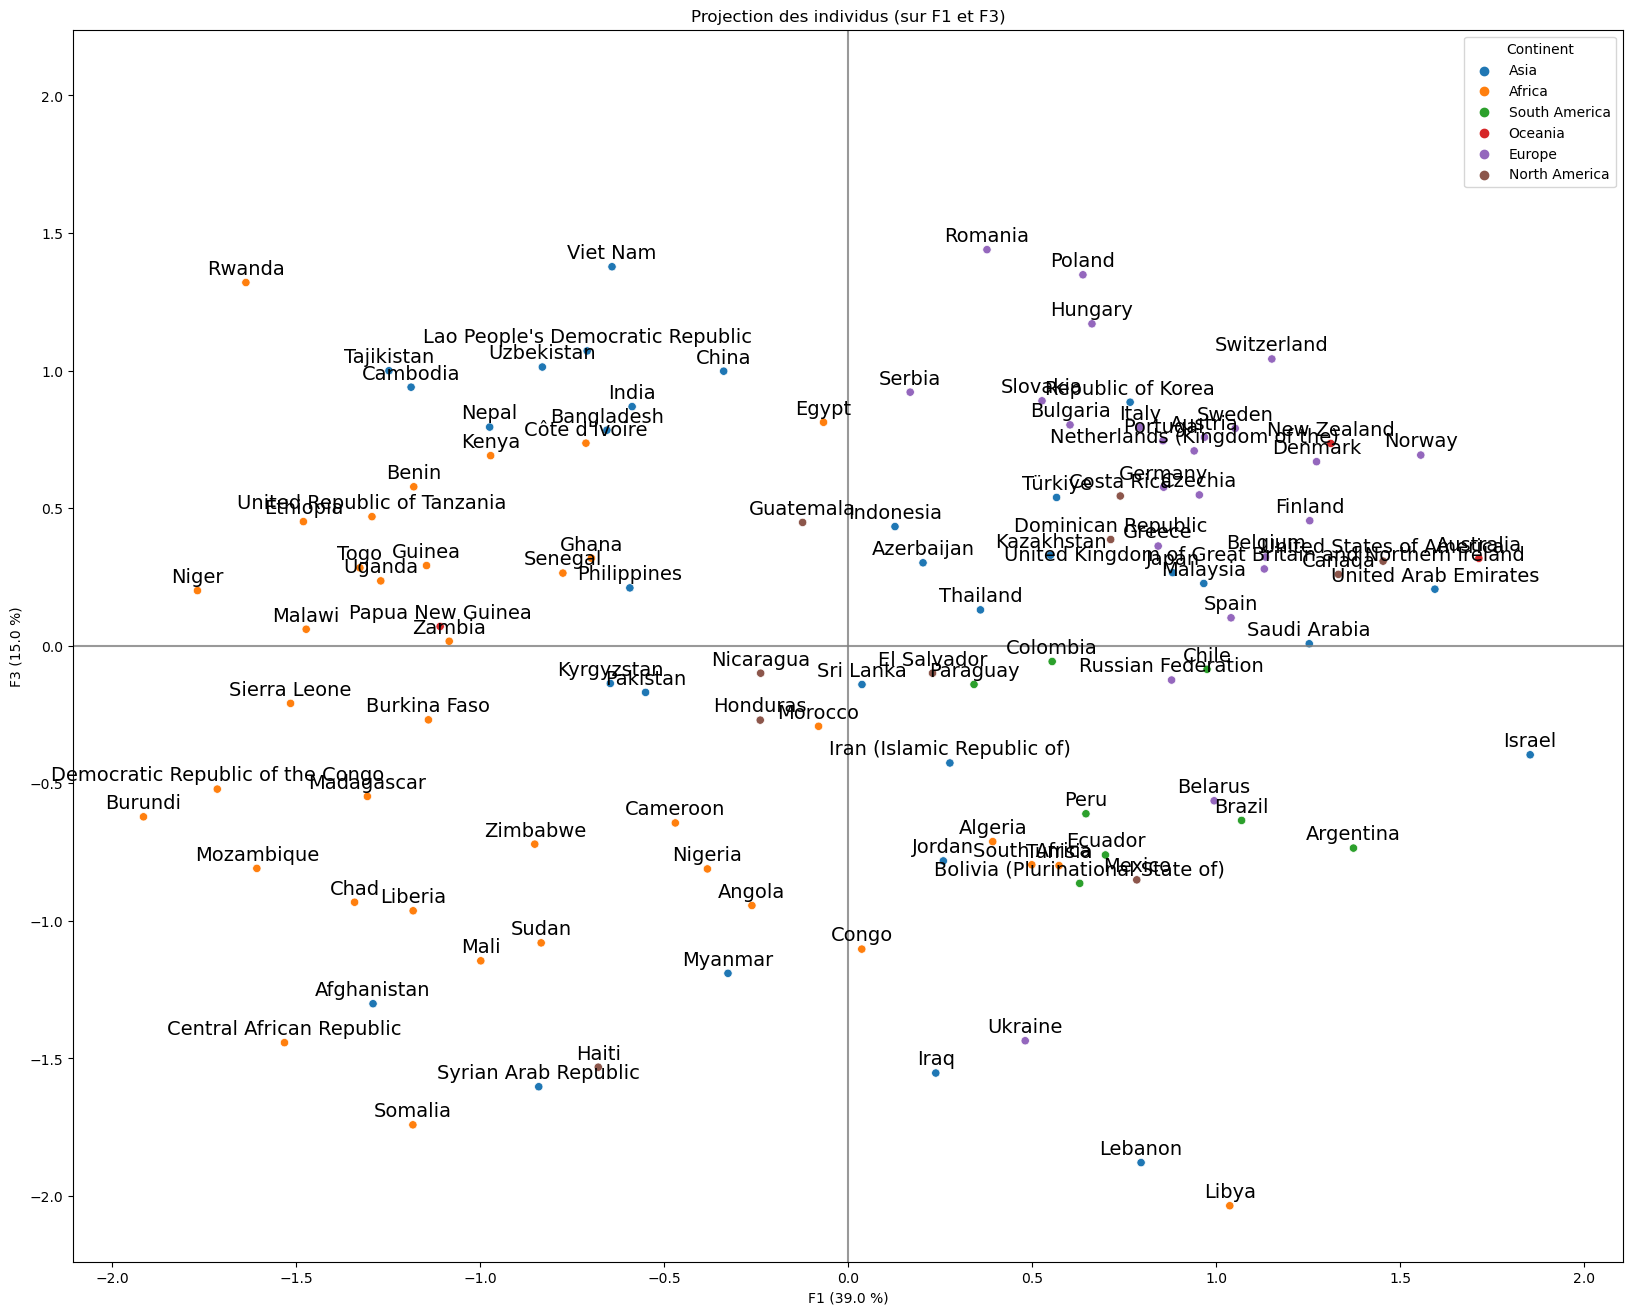

In [41]:
# projeter avec F1 et F3
display_factorial_planes(X_proj, (0,2), fa=fa, labels=countries,  clusters= continent_data, figsize=(20,16), marker="o")

# <a id="section4"></a>4. Réalisation d'une classification ascendante hiérarchique

# Construction de la matrice des distances

In [42]:
# choisir le nombre de composante conservées pour l'ACH
X_proj_2D = X_proj[:, :2]

# calculer de la matrice de similarité/dissimilarité
linkage_matrix = linkage(X_proj_2D, method='ward', metric='euclidean')

# Construction du dendogramme

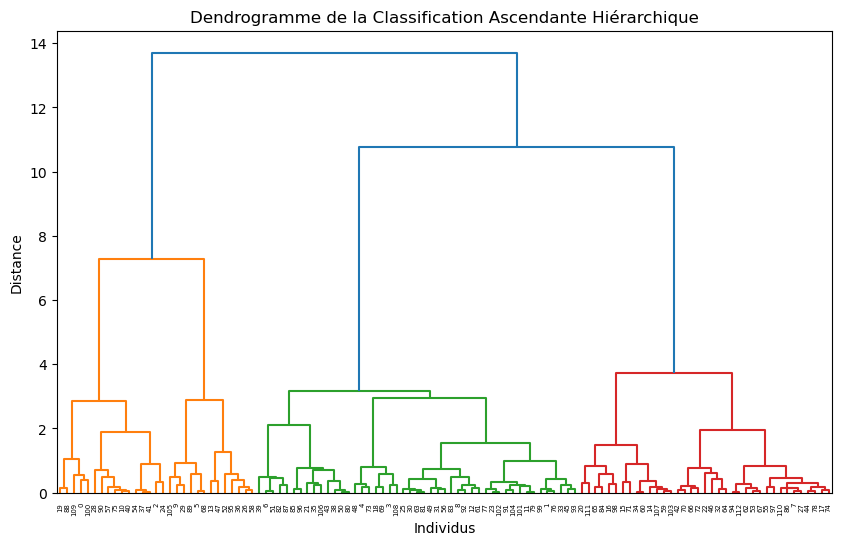

In [43]:
# affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.savefig('dendrogramme.png')
plt.show()

# Score de silhouette

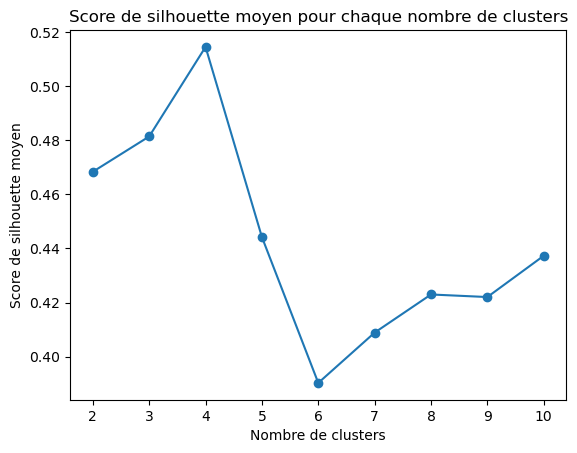

Nombre optimal de clusters : 4


In [44]:
# effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(X_proj_2D, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_proj_2D, clusters)
    silhouette_scores.append(silhouette_avg)

# tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.savefig('Score de silhouette cah.png')
plt.show()

# trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  
print("Nombre optimal de clusters :", optimal_num_clusters)

# Individu moyen de chaque cluster

In [45]:
# choisir le nombre de clusters
num_clusters = 4

# effectuer la CAH avec le nombre de clusters choisis
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# ajouter les informations de cluster dans le DataFrame
main_vars['Cluster_CAH'] = clusters

# afficher les statistiques des clusters
cluster_stats = main_vars.groupby('Cluster_CAH').mean()
cluster_stats

,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Importations,Part_Importation_Consumption,GDP,GDP_Evolution,Political Stability
Cluster_CAH,,,,,,,,
1,45.322500,10.096250,7.796250,4.032746,0.700000,8.054665,0.709375,-0.934375
2,77.214615,2.426923,20.177692,5.304034,0.662308,10.698221,2.894615,0.115385
3,74.810426,2.573404,27.919362,3.499167,0.126170,10.219656,3.349574,-0.068511
4,38.502432,8.981351,7.582162,1.676293,0.066486,8.400064,3.583514,-0.940811


In [46]:
# Calculer le score de silhouette avec le nombre de clusters choisis
silhouette_avg = silhouette_score(X_proj_2D, clusters)
print("Score de silhouette :", silhouette_avg)

Score de silhouette : 0.5145747097004056


# Box-plot des clusters

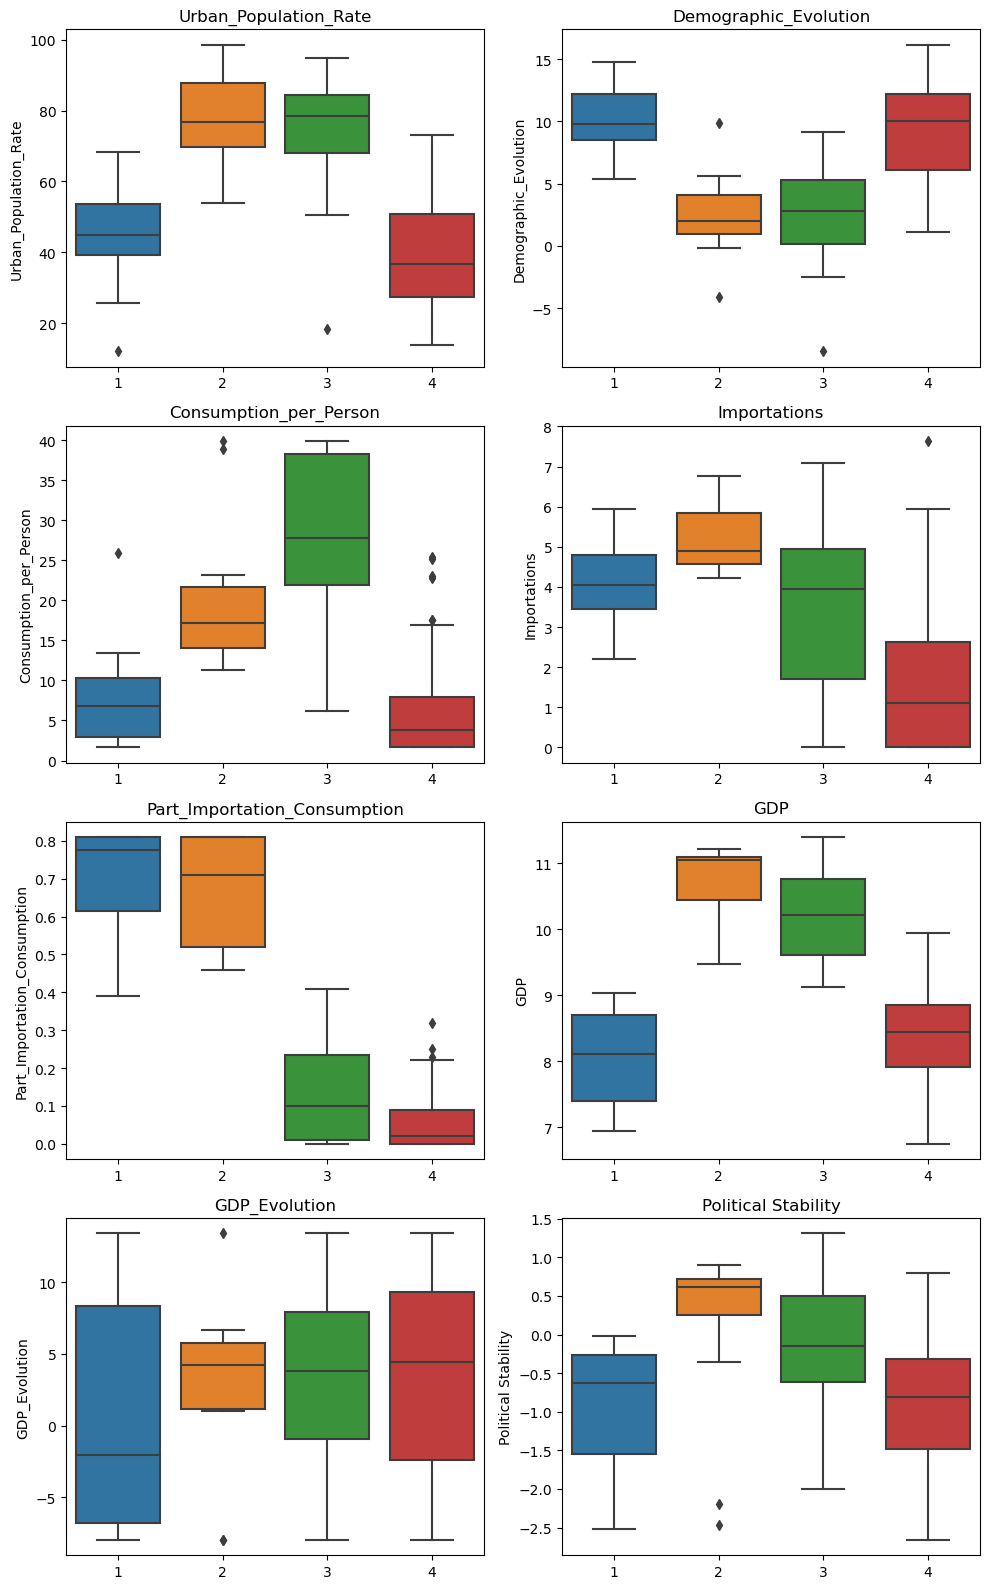

In [47]:
# exclure la colonne 'Cluster_CAH' des colonnes à tracer
cols_to_plot = main_vars.drop(columns=['Cluster_CAH']).columns
num_cols = len(cols_to_plot) 

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))

# Créer les boxplots pour chaque colonne sauf 'Cluster_CAH'
for i, column in enumerate(cols_to_plot, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster_CAH', y=column, data=main_vars)
    plt.xlabel('')  # Supprimer le label de l'axe des x
    plt.title(column)

plt.tight_layout()
plt.show()


# Projection des clusters avec les centroïdes dans le plan factoriel

In [48]:
# calculez les centroïdes à partir des données transformées
centroids_CAH = np.array([X_proj_2D[clusters == i].mean(axis=0) for i in np.unique(clusters)])
centroids_CAH

array([[-1.01552587,  1.54107785],
       [ 0.90231965,  1.54787671],
       [ 0.78319026, -0.42013957],
       [-0.87274821, -0.67656981]])

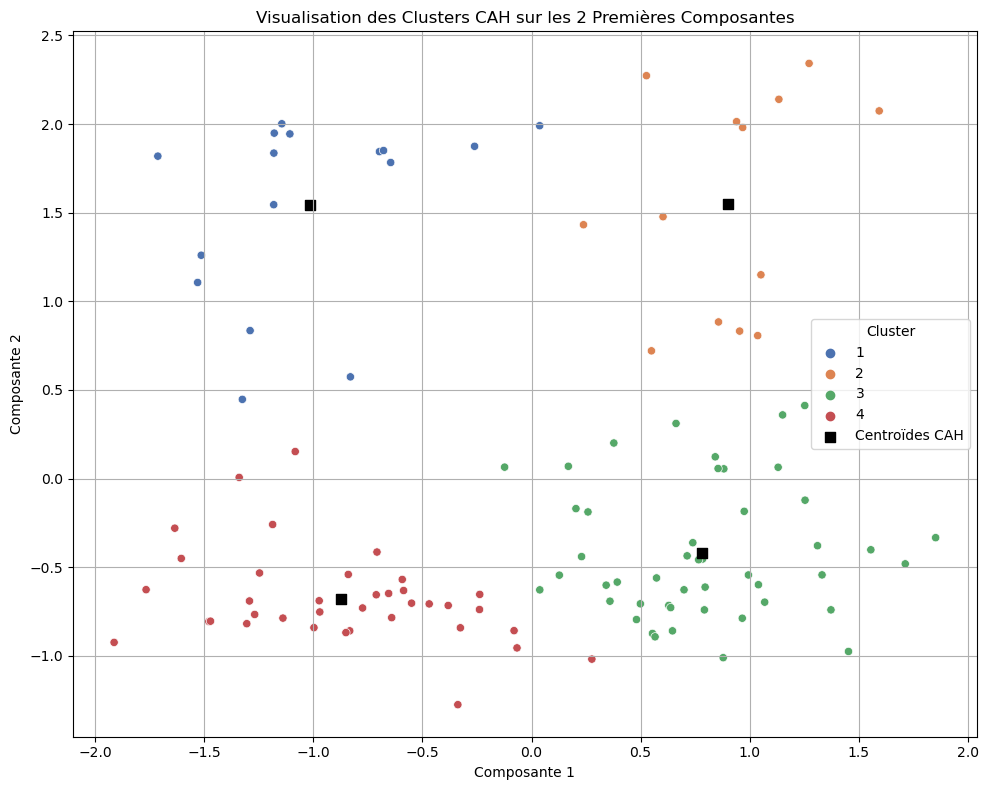

In [49]:
# Créer le scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_proj_2D[:, 0], y=X_proj_2D[:, 1], hue=clusters, palette='deep', edgecolor='w')

# Ajouter les centroïdes au scatter plot
plt.scatter(centroids_CAH[:, 0], centroids_CAH[:, 1], 
            c='black', s=50, marker='s', edgecolor='k', label='Centroïdes CAH')

# Ajouter des étiquettes et un titre
plt.title("Visualisation des Clusters CAH sur les 2 Premières Composantes")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

# Afficher la légende
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('projection clusters cah.png')
plt.show()

# <a id="section5"></a>5. Détermination des clusters avec les Kmeans

# Choix du nombre optimal de clusters

In [50]:
# choisir le nombre optimal de clusters (méthode du coude et du score de silhouette)

inertias = []
silhouettes = []
K = range(2, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42)  
    kmeanModel.fit(X_proj_2D)
    
    # Ajout des résultats d'inertie et du score de silhouette
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(X_proj_2D, kmeanModel.labels_))

C:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

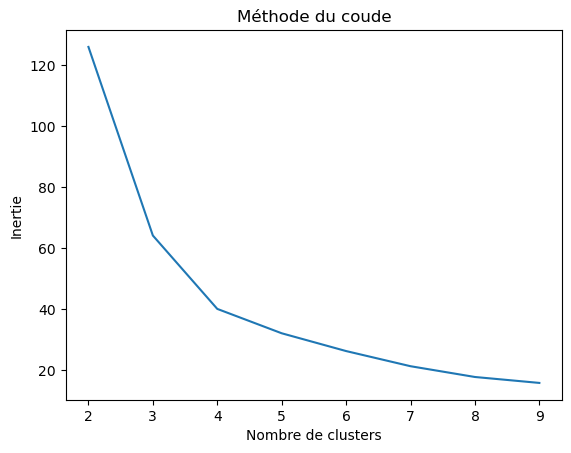

In [51]:
# tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.savefig('kmean coude.png')
plt.show()

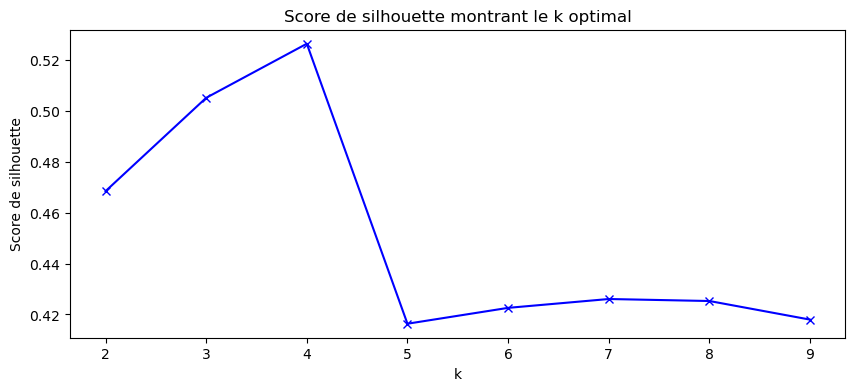

In [52]:
# tracer le graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette montrant le k optimal')
plt.savefig('score de silhouetteKmean.png')
plt.show()

In [53]:
# appliquer KMeans avec le nombre de clusters optimal trouvé 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_proj_2D)

C:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [54]:
# ajouter les labels de cluster au DataFrame
main_vars['cluster_kmean'] = kmeans.labels_+1
main_vars


,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Importations,Part_Importation_Consumption,GDP,GDP_Evolution,Political Stability,Cluster_CAH,cluster_kmean
Country,,,,,,,,,,
Afghanistan,25.54,12.50,1.63,3.526361,0.54,7.668514,-7.99,-2.52,1,4
Algeria,73.91,7.39,6.16,0.000000,0.00,9.479749,-4.50,-0.74,3,3
Angola,66.27,14.22,8.72,5.509388,0.81,8.910329,-7.99,-0.65,1,4
Argentina,93.53,2.77,39.89,2.397895,0.00,10.208336,-1.26,-0.01,3,3
Australia,85.63,5.41,39.89,1.386294,0.00,10.987341,4.08,0.93,3,3
...,...,...,...,...,...,...,...,...,...,...
United States of America,82.08,2.19,39.89,4.976734,0.01,11.174790,5.34,-0.04,3,3
Uzbekistan,49.79,6.69,6.51,4.605170,0.45,9.041744,13.42,-0.20,1,4
Viet Nam,38.76,3.65,16.94,5.356586,0.13,9.480619,13.42,-0.03,4,2


In [55]:
# calculer les scores de silhouette
silhouette_avg = silhouette_score(X_proj_2D, main_vars['cluster_kmean'])
silhouette_avg

0.5262571257876252

# Individu moyen de chaque cluster

In [56]:
# correspondance des clusters avec ceux de la CAH : 1 → 2, 2 → 4, 3 → 3, 4 → 1
cluster_mapping = {1: 2, 2: 4, 3: 3, 4: 1}

# appliquer la correspondance à la colonne 'cluster_kmean'
main_vars['cluster_kmean'] = main_vars['cluster_kmean'].replace(cluster_mapping)


In [57]:
# interprétation des groupes
# afficher les statistiques des clusters
cluster_stats = main_vars.groupby('cluster_kmean')[main_vars.columns[:-2]].mean()
cluster_stats

,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Importations,Part_Importation_Consumption,GDP,GDP_Evolution,Political Stability
cluster_kmean,,,,,,,,
1,43.793333,10.112667,6.591333,3.969355,0.692667,8.008706,1.289333,-0.995333
2,76.575000,2.957143,20.584286,5.281146,0.672857,10.558638,2.117143,0.105714
3,74.777083,2.604167,27.866667,3.525833,0.124583,10.207760,3.388958,-0.100208
4,37.538333,9.118333,7.087500,1.590103,0.066944,8.365381,3.537500,-0.922778


| Cluster | Taux de Population Urbaine | Évolution Démographique | Consommation par Personne | Importations | Part des Importations dans la Consommation | PIB | Évolution du PIB | Stabilité Politique |
|------------------|-------------------------------|-----------------------------|----------------------------------|-----------------------|-------------------------------------------------|-----------|---------------------|---------------------|
| 1                | 43.79                         | 10.11                       | 6.59                             | 3.97                  | 69.27                                           | 8,008.71  | 1.29                | -0.99               |
| 2                | 76.58                         | 2.96                        | 20.58                            | 5.28                  | 67.29                                           | 10,558.64 | 2.12                | 0.11                |
| 3                | 74.78                         | 2.60                        | 27.87                            | 3.53                  | 12.46                                           | 10,207.76 | 3.39                | -0.10               |
| 4                | 37.54                         | 9.12                        | 7.09                             | 1.59                  | 6.69                                            | 8,365.38  | 3.54                | -0.92               |


In [58]:
main_vars

,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Importations,Part_Importation_Consumption,GDP,GDP_Evolution,Political Stability,Cluster_CAH,cluster_kmean
Country,,,,,,,,,,
Afghanistan,25.54,12.50,1.63,3.526361,0.54,7.668514,-7.99,-2.52,1,1
Algeria,73.91,7.39,6.16,0.000000,0.00,9.479749,-4.50,-0.74,3,3
Angola,66.27,14.22,8.72,5.509388,0.81,8.910329,-7.99,-0.65,1,1
Argentina,93.53,2.77,39.89,2.397895,0.00,10.208336,-1.26,-0.01,3,3
Australia,85.63,5.41,39.89,1.386294,0.00,10.987341,4.08,0.93,3,3
...,...,...,...,...,...,...,...,...,...,...
United States of America,82.08,2.19,39.89,4.976734,0.01,11.174790,5.34,-0.04,3,3
Uzbekistan,49.79,6.69,6.51,4.605170,0.45,9.041744,13.42,-0.20,1,1
Viet Nam,38.76,3.65,16.94,5.356586,0.13,9.480619,13.42,-0.03,4,4


# Box-plot des clusters

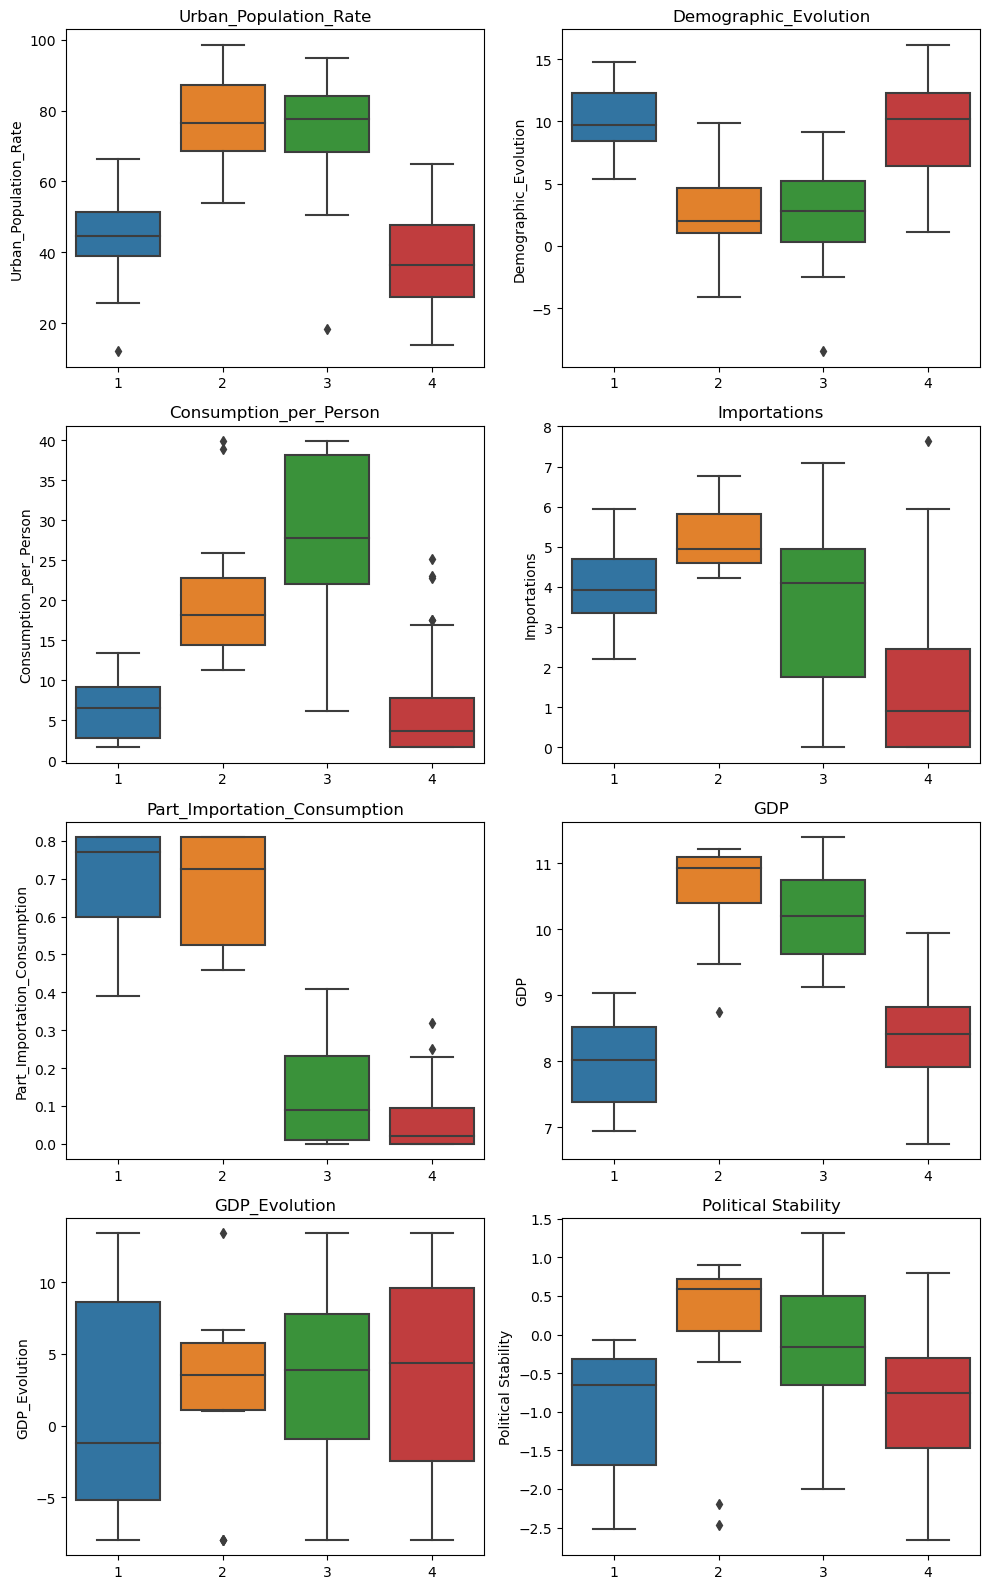

In [59]:
# exclure la colonne 'Cluster_CAH' et 'Cluster_kmean' des colonnes à tracer
cols_to_plot = main_vars.drop(columns=['Cluster_CAH','cluster_kmean']).columns
num_cols = len(cols_to_plot) 

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))

# Créer les boxplots pour chaque colonne sauf 'Cluster_CAH' et 'Cluster_kmean'
for i, column in enumerate(cols_to_plot, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_kmean', y=column, data=main_vars)
    plt.xlabel('')  # Supprimer le label de l'axe des x
    plt.title(column)

plt.tight_layout()
plt.show()


# Projection des clusters avec les centroïdes dans le plan factoriel

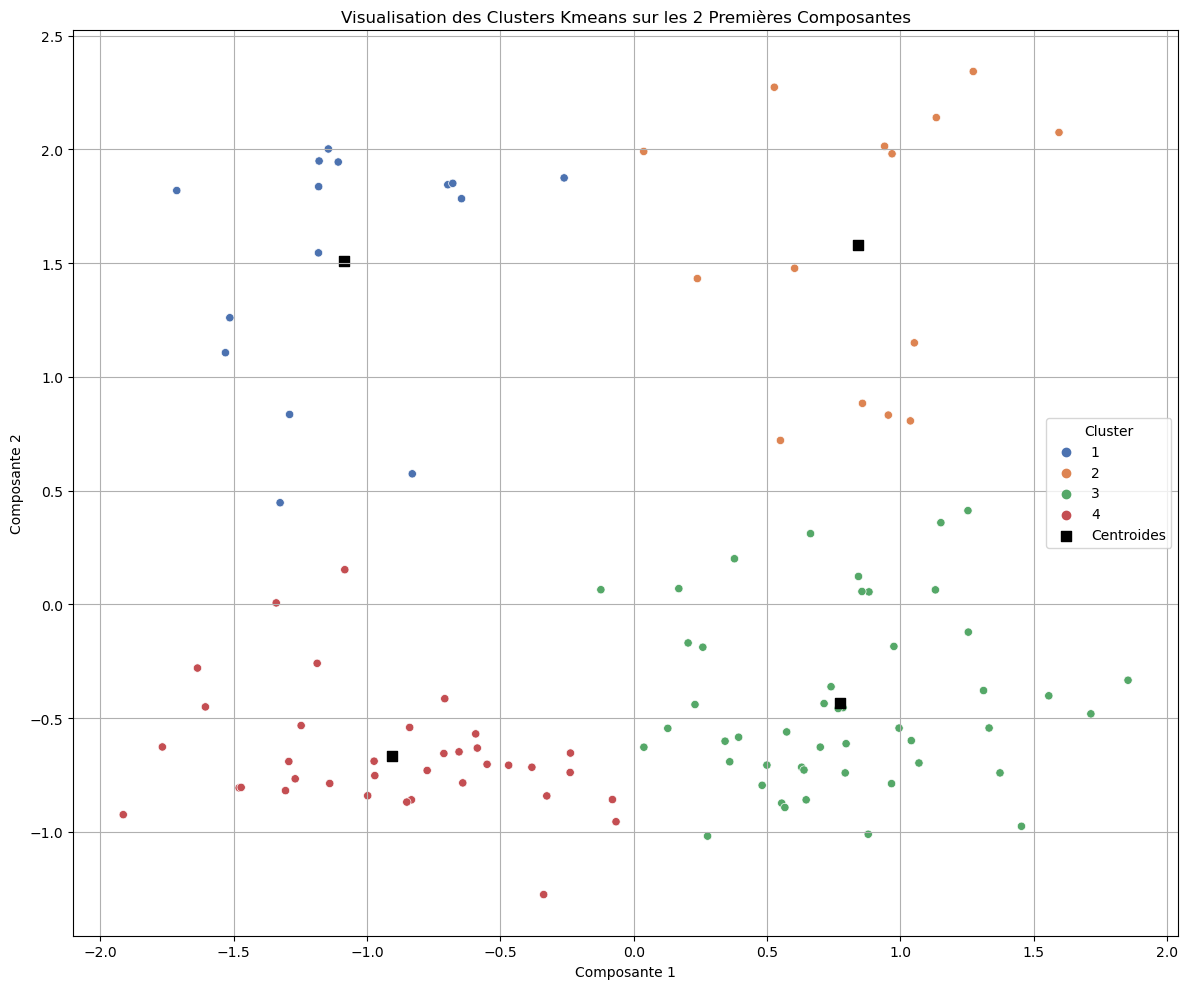

In [60]:
# extraire les centroïdes du modèle KMeans
centroids_kmean = kmeans.cluster_centers_

# créer le scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_proj_2D[:, 0], y=X_proj_2D[:, 1], hue=main_vars['cluster_kmean'], palette='deep', edgecolor='w')

# ajouter les centroïdes sur le scatter plot
plt.scatter(centroids_kmean[:, 0], centroids_kmean[:, 1], 
            c='black', s=50, marker='s', edgecolor='k', label='Centroides')

# ajouter des étiquettes et un titre
plt.title("Visualisation des Clusters Kmeans sur les 2 Premières Composantes")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")


# afficher la légende
plt.legend(title='Cluster', loc='right')
plt.grid(True)
plt.tight_layout()

# sauvegarde du graphique
plt.savefig('projection clusters kmean.png')
plt.show()

In [61]:
# afficher les coordonées des centroïdes dans F1 et F2
centroids_kmean

array([[ 0.84053428,  1.57949209],
       [-0.90467841, -0.66707765],
       [ 0.77263919, -0.43260099],
       [-1.08571589,  1.5111169 ]])

# <a id="section6"></a>6. Comparaisons des deux méthodes

In [62]:
# créer un tableau de contingence
contingency_table = pd.crosstab(main_vars['cluster_kmean'], main_vars['Cluster_CAH'])

# afficher le tableau de contingence
print("Tableau de contingence :")
print(contingency_table)

# calculer la cohérence des groupes
coherence = {}
for k in contingency_table.index:
    # calculer le nombre total d'individus dans le cluster K-means
    total_kmean = contingency_table.loc[k].sum()
    # trouver le maximum d'individus dans les clusters CAH pour ce cluster K-means
    max_cah = contingency_table.loc[k].max()
    
    # calculer le pourcentage de cohérence
    percentage_coherence = (max_cah / total_kmean) * 100 if total_kmean > 0 else 0
    coherence[k] = percentage_coherence

# afficher les résultats de cohérence
for k, perc in coherence.items():
    print(f"Cohérence du cluster K-means {k} : {perc:.2f}%")

Tableau de contingence :
Cluster_CAH     1   2   3   4
cluster_kmean                
1              15   0   0   0
2               1  13   0   0
3               0   0  47   1
4               0   0   0  36
Cohérence du cluster K-means 1 : 100.00%
Cohérence du cluster K-means 2 : 92.86%
Cohérence du cluster K-means 3 : 97.92%
Cohérence du cluster K-means 4 : 100.00%


 | Cluster | Nombre Total K-means | Correspondance CAH | Cohérence (%) |
|-------------------------|------------------------|-----------------------------------|---------------|
|  1                       | 15                     | 15                                | 100.00%       |
|  2                       | 14                     | 13                                | 92.86%        |
|  3                       | 48                     | 47                                | 97.92%        |
|  4                       | 36                     | 36                                | 100.00%       |


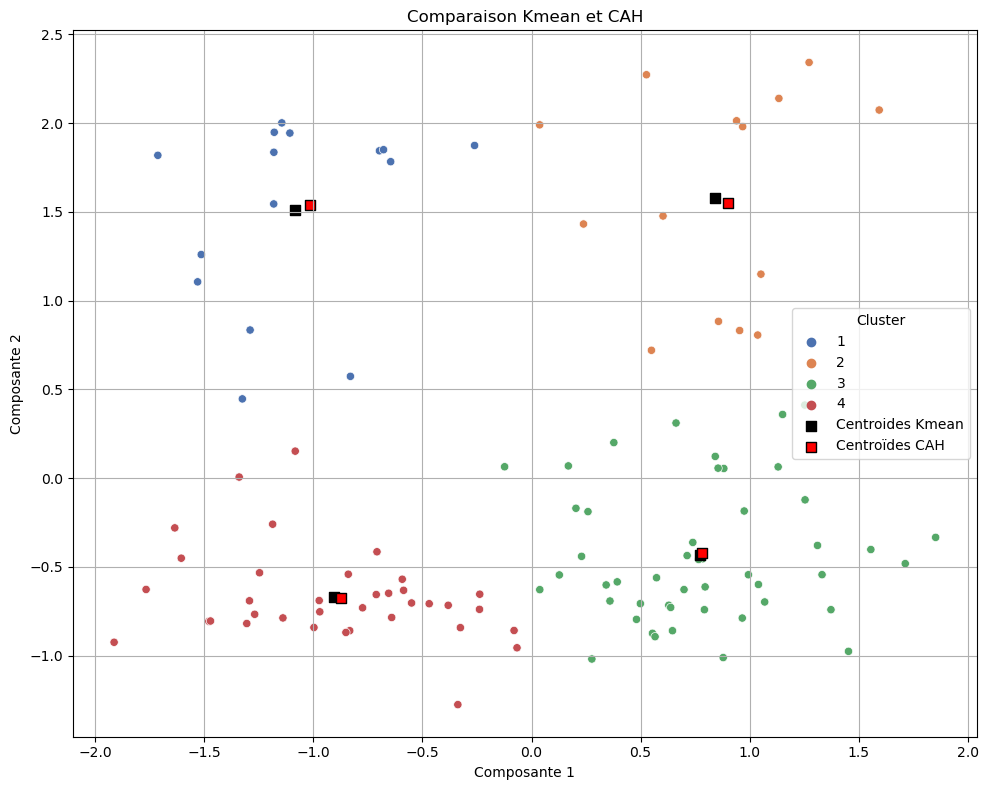

In [63]:
# extraire les centroïdes du modèle KMeans
centroids_kmean = kmeans.cluster_centers_

# créer le scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_proj_2D[:, 0], y=X_proj_2D[:, 1], hue=main_vars['cluster_kmean'], palette='deep', edgecolor='w')

# ajouter les centroïdes kmean sur le scatter plot
plt.scatter(centroids_kmean[:, 0], centroids_kmean[:, 1], 
            c='black', s=50, marker='s', edgecolor='k', label='Centroides Kmean')

# ajouter les centroïdes au scatter plot
plt.scatter(centroids_CAH[:, 0], centroids_CAH[:, 1], 
            c='red', s=50, marker='s', edgecolor='k', label='Centroïdes CAH')
# ajouter des étiquettes et un titre
plt.title("Comparaison Kmean et CAH")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

# afficher la légende
plt.legend(title='Cluster', loc='right')
plt.grid(True)
plt.tight_layout()

# sauvegarde du graphique
plt.savefig('Comparaison Kmean et CAH.png')
plt.show()

# <a id="section7"></a>7. Interprétation des clusters Kmeans

# Analyse du cluster 3 

In [64]:
# mettre sous forme de Df avec les variables avant les transformations logaritmiques et winsorisations
# remettre l'index 'Country' en colonne
main_vars = main_vars.reset_index()
df_cluster_kmean_3 = main_vars.loc[main_vars['cluster_kmean'] == 3, :]
df_cluster_kmean_3_country=df_cluster_kmean_3['Country'].to_list()
df_cluster3 = analysis_work_df.loc[analysis_work_df['Country'].isin(df_cluster_kmean_3_country),:]

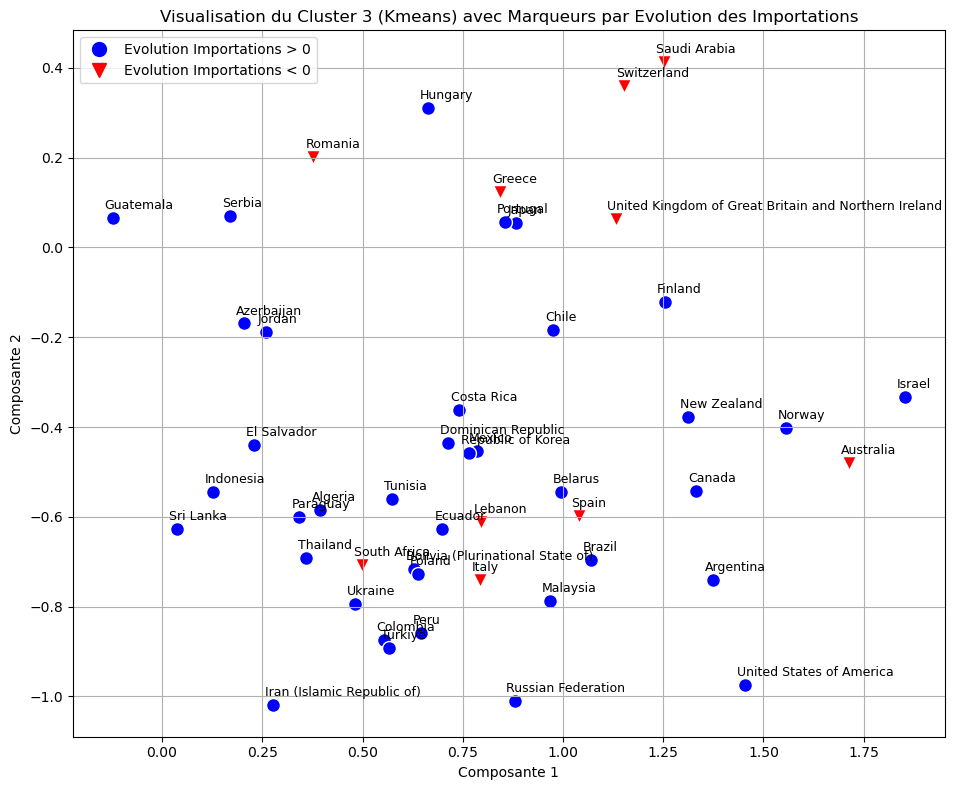

In [65]:
plt.figure(figsize=(10, 8))

# boucle pour ajouter les marqueurs conditionnels
for i, row in df_cluster3.iterrows():
    # si l'évolution des importations est négative, utiliser un triangle rouge
    if row['Evolution_Importations'] < 0:
        marker = 'v'
        color = 'red'
        label = 'Evolution Importations < 0'
    # si l'évolution des importations est positive, utiliser un rond bleu
    else:
        marker = 'o'
        color = 'blue'
        label = 'Evolution Importations > 0'
    
    # ajouter les points au graphique avec les marqueurs conditionnels
    plt.scatter(X_proj_2D[i, 0], X_proj_2D[i, 1], 
                color=color, marker=marker, edgecolor='w', s=100, label=label if i == 0 else "")  # Ajouter label une seule fois
    
    # afficher les noms des pays à côté des points
    plt.text(X_proj_2D[i, 0] - 0.02, X_proj_2D[i, 1] + 0.02, 
             row['Country'], fontsize=9)


# ajouter des étiquettes et un titre
plt.title("Visualisation du Cluster 3 (Kmeans) avec Marqueurs par Evolution des Importations")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

# créer la légende
# définir les éléments de la légende
triangle = mlines.Line2D([], [], color='red', marker='v', linestyle='None', markersize=10, label='Evolution Importations < 0')
circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Evolution Importations > 0')

# ajouter la légende
plt.legend(handles=[circle, triangle], loc='upper left')

# afficher la grille et ajuster la mise en page
plt.grid(True)
plt.tight_layout()
# sauvegarde du graphique
plt.savefig('projection_cluster_3_kmean_with_labels.png')
plt.show()


In [66]:
# classer les pays dans l'ordre des plus gros importateur
df_cluster3_sorted= df_cluster3.sort_values(['Importations'], ascending=False)
df_cluster3_sorted_stable= df_cluster3_sorted.loc[df_cluster3_sorted['Political Stability']>-1,:]
df_cluster3_sorted_stable

,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
63,Mexico,126705138.0,86.57,3.15,38.51,0.12,1196.0,0.25,23.05,6.27,9207.0,21809.6,-2.57,-0.69,North America
50,Japan,124612530.0,92.97,-1.62,26.21,0.38,1136.0,0.35,2.16,-24.87,9726.0,44913.8,0.18,1.07,Asia
106,United Kingdom of Great Britain and Northern I...,67281039.0,84.67,1.84,33.98,0.02,747.0,0.33,-7.89,-11.07,340.0,55183.6,2.53,0.50,Europe
85,Saudi Arabia,35950396.0,82.89,5.14,42.03,0.14,626.0,0.41,-15.97,-29.99,4694.0,51246.4,5.19,-0.36,Asia
91,South Africa,59392255.0,67.82,4.86,40.11,0.08,372.0,0.16,-27.63,-35.89,9354.0,14322.3,-3.69,-0.72,Africa
83,Russian Federation,145102755.0,74.18,-0.24,31.41,-0.01,246.0,0.05,8.85,10.69,2494.0,38128.7,2.98,-0.92,Europe
18,Canada,38155012.0,81.16,4.38,39.89,0.02,201.0,0.13,5.24,-1.06,6005.0,56716.4,0.72,0.77,North America
92,Spain,47486935.0,79.29,1.94,30.37,-0.01,189.0,0.13,-11.27,-12.50,1055.0,45787.7,-0.13,0.27,Europe
81,Republic of Korea,51830139.0,81.16,0.62,22.15,0.18,183.0,0.16,33.58,12.63,8920.0,49977.0,8.56,0.56,Asia
21,Chile,19493184.0,83.82,6.12,38.06,-0.05,168.0,0.23,12.75,11.84,11663.0,29691.2,3.25,0.12,South America


In [67]:
df_cluster3_sorted_stable.shape

(43, 15)

On ne garde que les pays dont l'évolution des importations et de la part importation/consomation sont positive. 

In [68]:
# filtrer pour garder seulement les pays avec une évolution des importations et de la part importation/consommation positives
df_cluster3_sorted_filtered = df_cluster3_sorted_stable[
    (df_cluster3_sorted_stable['Evolution_Importations'] > 0) &
    (df_cluster3_sorted_stable['Evolution_Part_Importation_Consumption'] > 0)
]
df_cluster3_sorted_filtered

,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
63,Mexico,126705138.0,86.57,3.15,38.51,0.12,1196.0,0.25,23.05,6.27,9207.0,21809.6,-2.57,-0.69,North America
83,Russian Federation,145102755.0,74.18,-0.24,31.41,-0.01,246.0,0.05,8.85,10.69,2494.0,38128.7,2.98,-0.92,Europe
81,Republic of Korea,51830139.0,81.16,0.62,22.15,0.18,183.0,0.16,33.58,12.63,8920.0,49977.0,8.56,0.56,Asia
21,Chile,19493184.0,83.82,6.12,38.06,-0.05,168.0,0.23,12.75,11.84,11663.0,29691.2,3.25,0.12,South America
108,United States of America,336997624.0,82.08,2.19,52.80,-0.04,144.0,0.01,17.07,19.34,5838.0,71308.9,5.34,-0.04,North America
77,Peru,33715471.0,78.43,6.68,43.16,0.14,104.0,0.07,73.33,42.48,10268.0,15102.6,0.38,-0.45,South America
23,Colombia,51516562.0,80.25,6.55,34.84,0.03,101.0,0.06,29.49,18.23,8708.0,18732.7,8.25,-0.64,South America
61,Malaysia,33573874.0,77.04,5.00,50.49,-0.05,97.0,0.06,42.65,42.31,10436.0,32735.4,5.77,0.14,Asia
80,Portugal,10290103.0,66.15,-0.17,31.00,0.01,84.0,0.26,2.44,1.15,1453.0,41240.4,5.07,0.86,Europe
43,Hungary,9709786.0,71.33,-0.81,25.34,0.01,79.0,0.32,36.21,36.21,1247.0,40683.9,13.62,0.64,Europe


On peut mettre en avant dans cette liste les pays faisant partie de l'europe car les coûts de transport moindre, ainsi que les taxes frontalières nulles ou peu élevées leur donne un avantage

In [69]:
#lister les pays appartenant à l'Europe
european_countries = continent_data[continent_data == 'Europe'].index.tolist()

In [70]:
# faire une liste des pays européens dans cluster 3
european_cluster3_country = df_cluster3_sorted_filtered[df_cluster_kmean_3['Country'].isin(european_countries)]['Country'].tolist()

C:\Users\mrgxl\AppData\Local\Temp\ipykernel_18164\2737317122.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  european_cluster3_country = df_cluster3_sorted_filtered[df_cluster_kmean_3['Country'].isin(european_countries)]['Country'].tolist()


In [71]:
# afficher le df des pays européens 
df_european_cluster3 = df_cluster3_sorted_stable.loc[df_cluster3['Country'].isin(european_cluster3_country),:]
df_european_cluster3

,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
83,Russian Federation,145102755.0,74.18,-0.24,31.41,-0.01,246.0,0.05,8.85,10.69,2494.0,38128.7,2.98,-0.92,Europe
80,Portugal,10290103.0,66.15,-0.17,31.00,0.01,84.0,0.26,2.44,1.15,1453.0,41240.4,5.07,0.86,Europe
43,Hungary,9709786.0,71.33,-0.81,25.34,0.01,79.0,0.32,36.21,36.21,1247.0,40683.9,13.62,0.64,Europe
79,Poland,38307726.0,59.35,-0.58,30.28,-0.08,69.0,0.06,25.45,37.68,1368.0,43661.5,18.80,0.50,Europe
8,Belarus,9578167.0,78.40,-1.34,32.57,0.19,32.0,0.10,52.38,29.43,1824.0,26526.6,0.62,-0.79,Europe
87,Serbia,7296769.0,67.34,-2.25,10.69,-0.11,19.0,0.24,58.33,82.69,1450.0,23741.2,19.67,-0.17,Europe
73,Norway,5403021.0,84.82,2.38,21.65,0.04,4.0,0.03,100.00,88.03,1343.0,88712.0,4.02,0.86,Europe


On exclue Russie et Bielorussie jugé trop difficile

In [72]:
# exclure la Russie et la Biélorussie
df_cluster3_selection = df_european_cluster3[~df_european_cluster3['Country'].isin(['Russian Federation', 'Belarus'])]

df_cluster3_selection


,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
80,Portugal,10290103.0,66.15,-0.17,31.00,0.01,84.0,0.26,2.44,1.15,1453.0,41240.4,5.07,0.86,Europe
43,Hungary,9709786.0,71.33,-0.81,25.34,0.01,79.0,0.32,36.21,36.21,1247.0,40683.9,13.62,0.64,Europe
79,Poland,38307726.0,59.35,-0.58,30.28,-0.08,69.0,0.06,25.45,37.68,1368.0,43661.5,18.80,0.50,Europe
87,Serbia,7296769.0,67.34,-2.25,10.69,-0.11,19.0,0.24,58.33,82.69,1450.0,23741.2,19.67,-0.17,Europe
73,Norway,5403021.0,84.82,2.38,21.65,0.04,4.0,0.03,100.00,88.03,1343.0,88712.0,4.02,0.86,Europe


**Caractéristiques  :**
Consommation élevée de viande, mais faible dépendance aux importations pour subvenir à cette demande.
Potentiel pour des produits haut de gamme, tels que le poulet bio, grâce au pouvoir d'achat élevé des consommateurs de ces pays.


Après avoir exclu les pays présentant une instabilité politique significative (indice < -1), nous retenons une sélection de pays européens dont les importations sont en augmentation et qui présentent des avantages stratégiques :

Proximité géographique et culturelle, réduisant les coûts logistiques et les frais de douane.
Les consommateurs de ces pays montrent une plus grande réceptivité aux labels de qualité tels que le poulet bio, ce qui renforce l'opportunité de pénétrer ces marchés.


| Country  | Importations (milliers tonnes) | Evolution Importations (%)| Evolution Importation/Consumption (%)|
|----------|--------------|------------------------|----------------------------------------|
| Portugal | 84.0         | 2.44                   | 1.15                                   |
| Hungary  | 79.0         | 36.21                  | 36.21                                  |
| Poland   | 69.0         | 25.45                  | 37.68                                  |
| Serbia   | 19.0         | 58.33                  | 82.69                                  |
| Norway   | 4.0          | 100.00                 | 88.03                                  |


# Analyse cluster 2

In [73]:
# créer un Df avec seulement les membres du cluster 2
df_cluster_kmean_2 = main_vars.loc[main_vars['cluster_kmean'] == 2, :]
df_cluster_kmean_2_country=df_cluster_kmean_2['Country'].to_list()

In [74]:
# filtrer les données pour le cluster 2 à partir du df_cluster2
df_cluster2 = analysis_work_df.loc[analysis_work_df['Country'].isin(df_cluster_kmean_2_country),:]

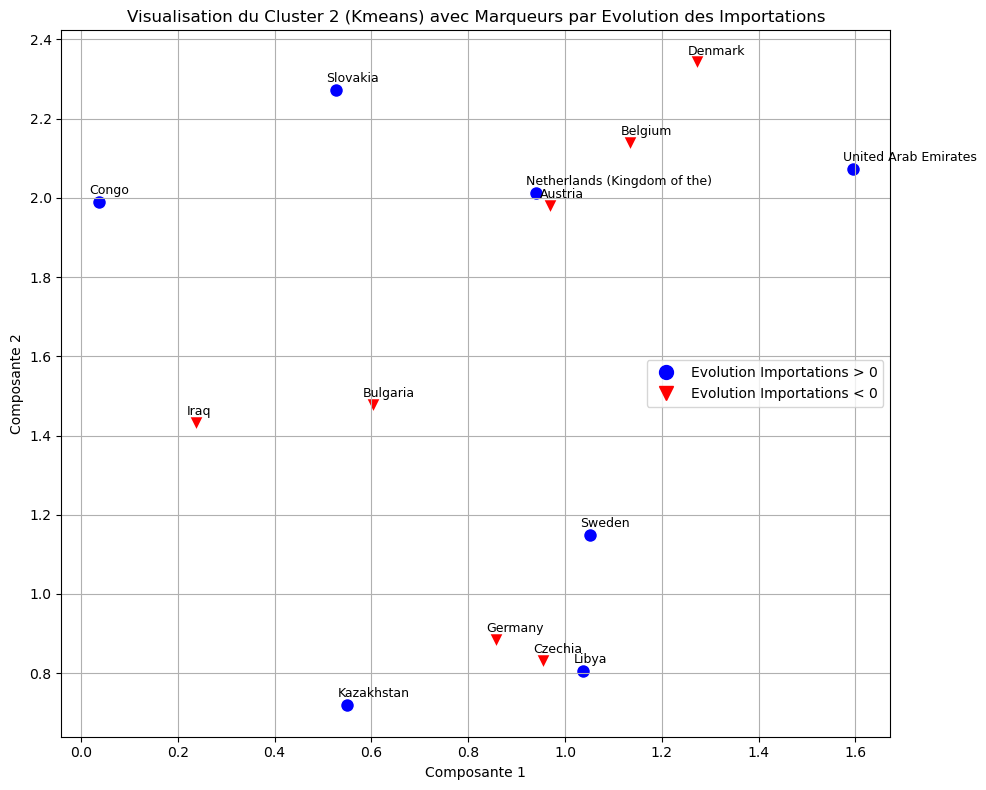

In [75]:
plt.figure(figsize=(10, 8))

# boucle pour ajouter les marqueurs conditionnels
for i, row in df_cluster2.iterrows():
    # si l'évolution des importations est négative, utiliser un triangle rouge
    if row['Evolution_Importations'] < 0:
        marker = 'v'
        color = 'red'
        label = 'Evolution Importations < 0'
    # si l'évolution des importations est positive, utiliser un rond bleu
    else:
        marker = 'o'
        color = 'blue'
        label = 'Evolution Importations > 0'
    
    # ajouter les points au graphique avec les marqueurs conditionnels
    plt.scatter(X_proj_2D[i, 0], X_proj_2D[i, 1], 
                color=color, marker=marker, edgecolor='w', s=100, label=label if i == 0 else "")  # ajouter label une seule fois
    
    # afficher les noms des pays à côté des points
    plt.text(X_proj_2D[i, 0] - 0.02, X_proj_2D[i, 1] + 0.02, 
             row['Country'], fontsize=9)


# ajouter des étiquettes et un titre
plt.title("Visualisation du Cluster 2 (Kmeans) avec Marqueurs par Evolution des Importations")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

# Créer la légende
# Définir les éléments de la légende
triangle = mlines.Line2D([], [], color='red', marker='v', linestyle='None', markersize=10, label='Evolution Importations < 0')
circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Evolution Importations > 0')

# Ajouter la légende
plt.legend(handles=[circle, triangle], loc='right')

# Afficher la grille et ajuster la mise en page
plt.grid(True)
plt.tight_layout()
# Sauvegarde du graphique
plt.savefig('projection_cluster_2_kmean_with_labels.png')
plt.show()


In [76]:
# classer les pays dans l'ordre des plus gros importateur
df_cluster2_sorted= df_cluster2.sort_values(['Importations'], ascending=False)
df_cluster2_stable= df_cluster2_sorted.loc[df_cluster2_sorted['Political Stability']>-1,:]
df_cluster2_stable

,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
105,United Arab Emirates,9365145.0,92.63,3.27,55.85,1.04,856.0,1.64,82.52,-13.45,5250.0,73724.3,4.71,0.70,Asia
36,Germany,83408554.0,76.78,0.95,17.16,-0.05,768.0,0.54,-8.79,-4.90,440.0,62605.5,1.01,0.61,Europe
68,Netherlands (Kingdom of the),17501696.0,91.13,1.71,11.83,-0.25,763.0,3.69,25.49,65.51,430.0,69953.7,5.69,0.72,Europe
9,Belgium,11611419.0,98.60,1.99,14.04,0.24,312.0,1.91,-0.95,-21.61,262.0,63431.0,4.25,0.58,Europe
52,Kazakhstan,19196465.0,57.10,4.81,20.26,0.12,183.0,0.47,4.57,-11.29,4820.0,34210.9,2.15,-0.36,Asia
24,Congo,5835806.0,68.26,9.85,25.87,0.28,145.0,0.96,39.42,-1.20,6041.0,6272.3,-11.45,-0.02,Africa
26,Czechia,10510751.0,75.08,-0.20,23.21,0.04,113.0,0.46,-3.42,-7.38,885.0,48784.0,2.78,0.82,Europe
5,Austria,8922082.0,58.19,1.42,16.48,-0.10,109.0,0.74,-0.91,8.53,1035.0,65836.9,1.18,0.64,Europe
29,Denmark,5854240.0,87.71,2.04,19.13,-0.24,95.0,0.85,-28.57,-7.53,1028.0,71224.3,6.69,0.87,Europe
13,Bulgaria,6885868.0,76.10,-4.13,21.64,-0.01,92.0,0.62,-14.81,-10.24,1761.0,32511.8,21.47,0.25,Europe


In [77]:
# filtrer pour garder seulement les pays avec une évolution des importations positives
df_cluster2_filtered = df_cluster2_stable[(df_cluster2_stable['Evolution_Importations'] > 0)]
# exclure le Congo car passage de frontières très couteux (cf: fichier 'cost_to_export')
df_cluster2_selection = df_cluster2_filtered[~df_cluster2_filtered['Country'].isin(['Congo'])]
df_cluster2_selection

,Country,Population,Urban_Population_Rate,Demographic_Evolution,Consumption_per_Person,Evolution_Consumption_per_Person,Importations,Part_Importation_Consumption,Evolution_Importations,Evolution_Part_Importation_Consumption,Distance,GDP,GDP_Evolution,Political Stability,Continent
105,United Arab Emirates,9365145.0,92.63,3.27,55.85,1.04,856.0,1.64,82.52,-13.45,5250.0,73724.3,4.71,0.70,Asia
68,Netherlands (Kingdom of the),17501696.0,91.13,1.71,11.83,-0.25,763.0,3.69,25.49,65.51,430.0,69953.7,5.69,0.72,Europe
52,Kazakhstan,19196465.0,57.10,4.81,20.26,0.12,183.0,0.47,4.57,-11.29,4820.0,34210.9,2.15,-0.36,Asia
95,Sweden,10467097.0,85.89,4.07,15.48,-0.05,85.0,0.52,1.19,2.44,1546.0,64778.0,5.75,0.90,Europe
89,Slovakia,5447622.0,53.85,0.15,13.03,-0.07,68.0,0.96,7.94,15.54,1095.0,38566.3,5.95,0.44,Europe


**Caractéristiques :**
Consommation élevée de viande 
Dépendance élevée aux importations
Potentiel pour des produits haut de gamme
Après avoir exclu les pays présentant une instabilité politique significative (indice < -1), nous avons identifié une sélection de pays dont les importations sont en augmentation :

**Trois pays européens :** 
Proximité géographique et culturelle, ce qui réduit les coûts logistiques, et renforce l'opportunité d'introduire le poulet bio.

**Émirats Arabes Unis :** 
Opportunité majeure grâce à sa forte consommation de viande et son pouvoir d'achat. 
Nécessite une offre de produits labellisés halal pour s'aligner avec les attentes des consommateurs locaux.

**Kazakhstan :**
Marché en croissance avec un pouvoir d'achat en augmentation et une dépendance croissante aux importations. 


| Country                     | Importations (milliers tonnes) | Evolution Importations (%) | Evolution Importation/Consumption (%) |
|------------------------------|-------------------------------|----------------------------|---------------------------------------|
| **United Arab Emirates**     | 856.0                         | 82.52                      | -13.45                                |
| **Netherlands** | 763.0                     | 25.49                      | 65.51                                 |
| **Kazakhstan**               | 183.0                         | 4.57                       | -11.29                                |                              |
| **Sweden**                   | 85.0                          | 1.19                       | 2.44                                  |
| **Slovakia**                 | 68.0                          | 7.94                       | 15.54                                 |



# <a id="section8"></a>8. Conclusion

Bien que notre sélection de pays soit restreinte, cette approche ciblée reflète notre volonté de rester prudents et de nous concentrer sur les marchés les plus prometteurs pour un premier pas à l'international. 

Les marchés européens offrent des avantages stratégiques immédiats, tandis que des marchés plus complexes, comme les Émirats Arabes Unis et le Kazakhstan, offrent un potentiel de croissance important à condition de prendre en compte leurs spécificités culturelles et logistiques. 

Cette démarche progressive nous permet de poser des bases solides pour une expansion future.
